# Projet ADD 

In [2]:
library(funFEM)
library(ggplot2)
library(corrplot)
data(velib)
library(FactoMineR)
library(factoextra)
library(cluster)
#help("velib")

In [4]:
# data preparation
x <- as.matrix(velib$data)
colnames(x) <- 1:ncol(x)
rownames(x) <- velib$names

n <- nrow(x)
stations <- 1:n 
coord <- velib$position[stations,]

# select exactly 7 days of data (we remove the first 13 dates)
dates <- 14:181
x <- x[stations, dates]
colnames(x) <- 1:length(dates)

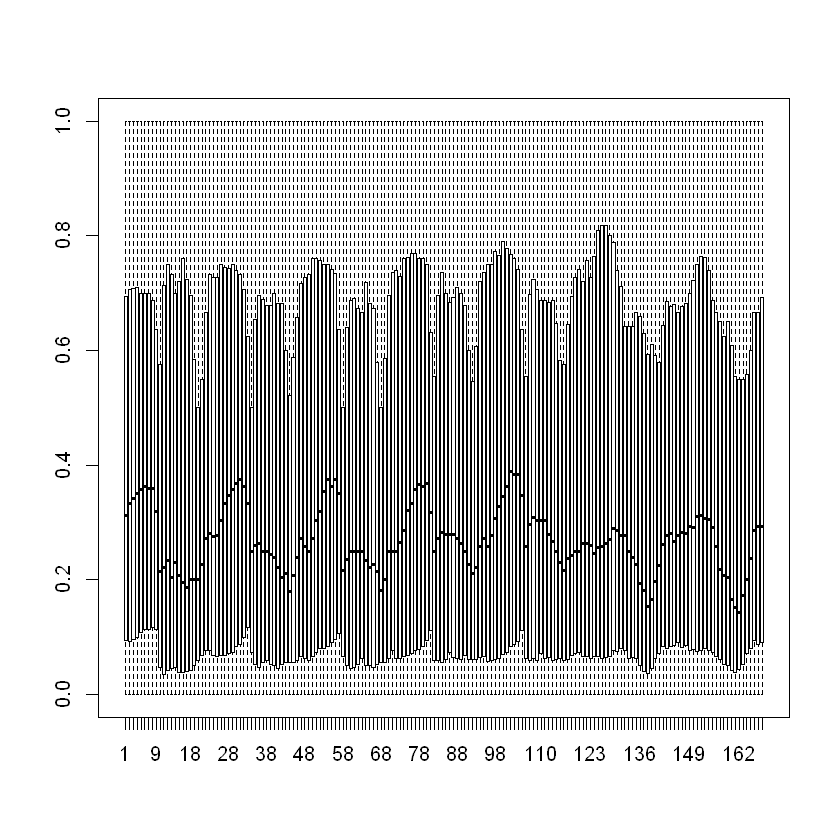

In [4]:
boxplot(x)

## ACP

Warning message in plot.window(xlim, ylim, log = log, ...):
""combine" n'est pas un paramètre graphique"Warning message in axis(if (horiz) 2 else 1, at = at.l, labels = names.arg, lty = axis.lty, :
""combine" n'est pas un paramètre graphique"Warning message in title(main = main, sub = sub, xlab = xlab, ylab = ylab, ...):
""combine" n'est pas un paramètre graphique"Warning message in axis(if (horiz) 1 else 2, cex.axis = cex.axis, ...):
""combine" n'est pas un paramètre graphique"

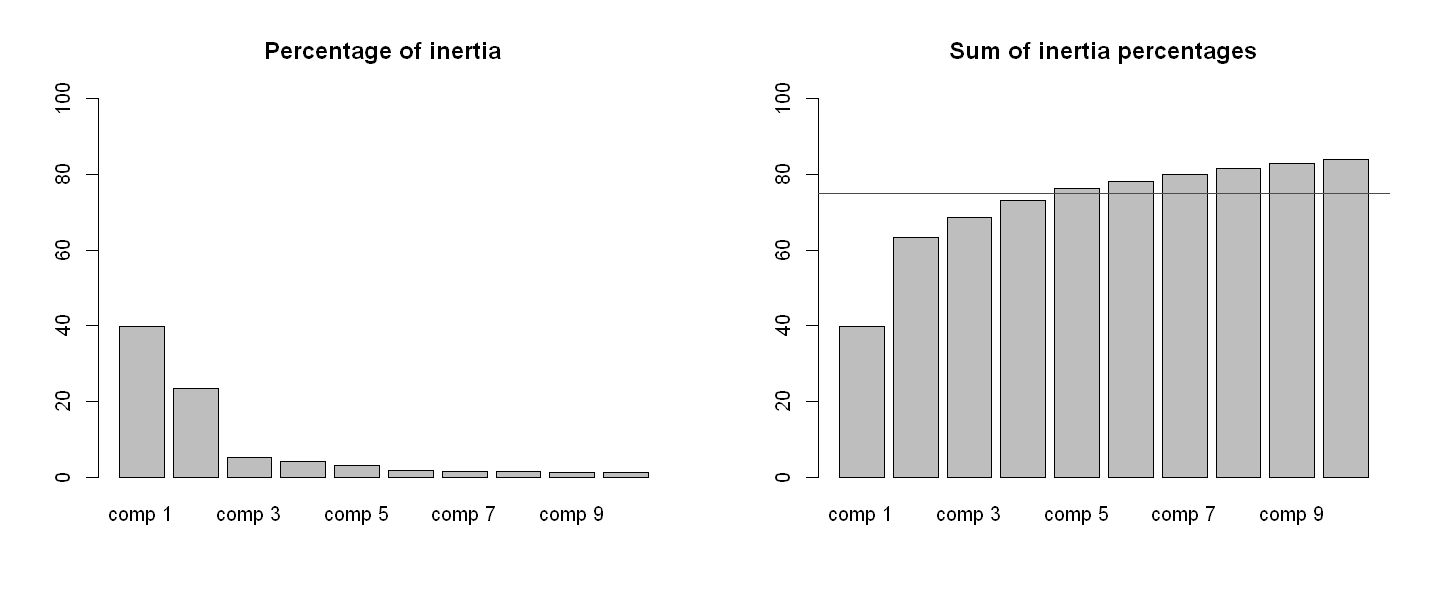

In [5]:
acp <- PCA(x, scale.unit = TRUE, ncp = 12, graph = F)
options(repr.plot.width = 12, repr.plot.height = 5)
# barplot of the inertias and percentage of inertia associated to each principal component
par(mfrow = c(1, 2))
#barplot(acp$eig[1:10, 1], main = "Inertia")
barplot(acp$eig[1:10, 2], ylim = c(0, 100), main = "Percentage of inertia")
barplot(cumsum(acp$eig[1:10, 2]), ylim = c(0, 100), main = "Sum of inertia percentages", combine = TRUE)
abline(h = 75, col='red')

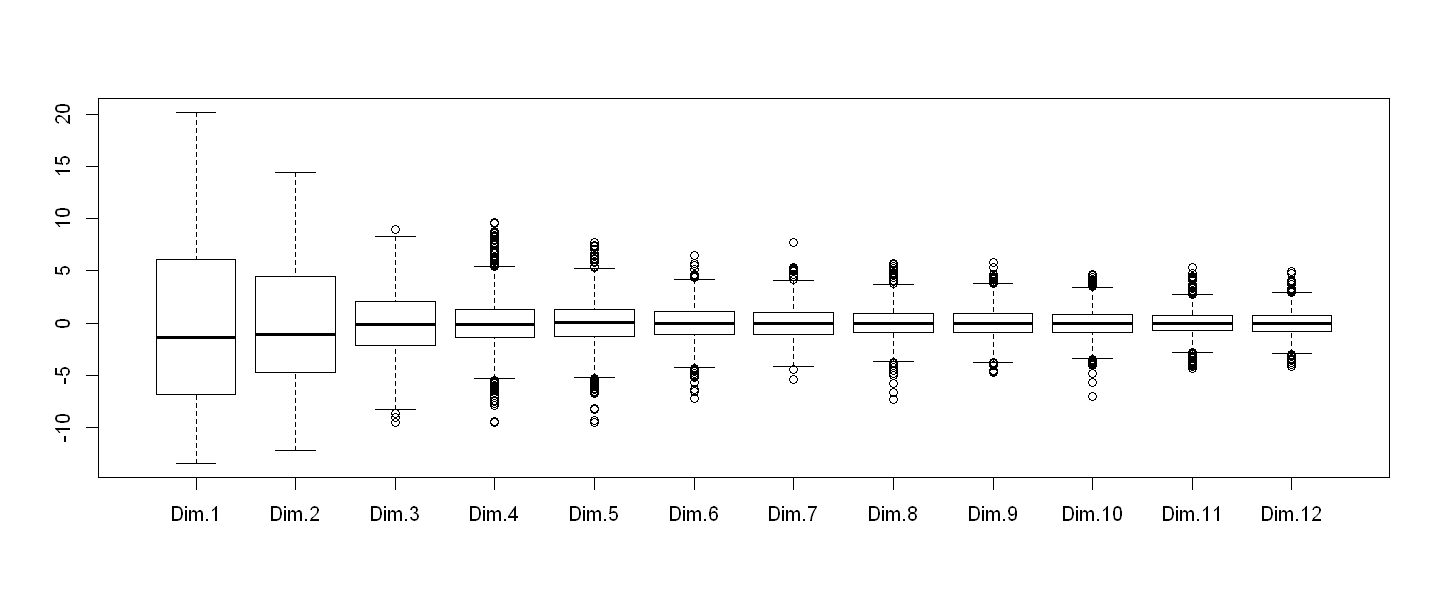

In [6]:
boxplot(acp$ind$coord)

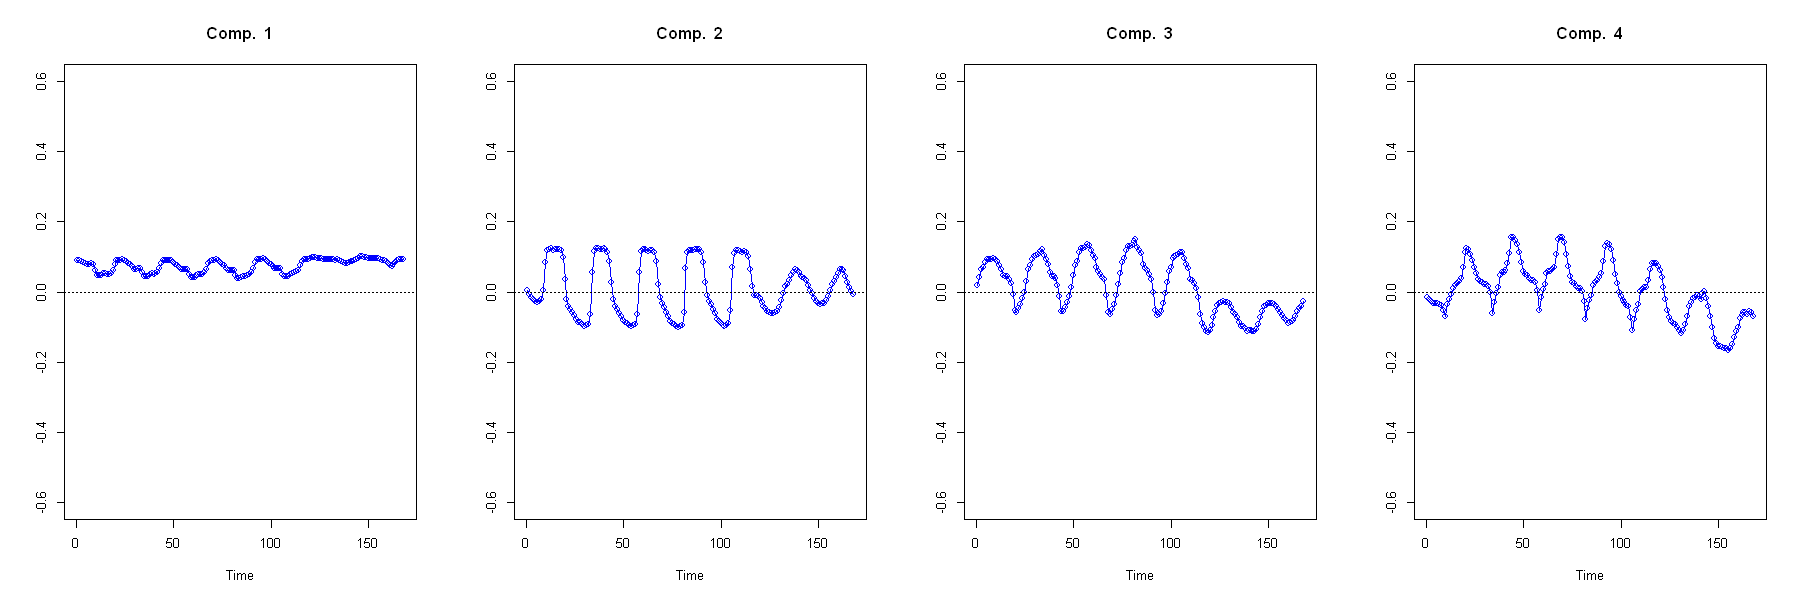

In [7]:
options(repr.plot.width = 15, repr.plot.height = 5)
par(mfrow = c(1, 4))
for (i in 1:4){
    plot(acp$svd$V[, i], type = "o", main = paste("Comp. ", i), xlab = "Time", ylab = "",
         ylim = c(-0.6, 0.6), col = "blue")
    abline(h = 0, lty = "dotted")
}

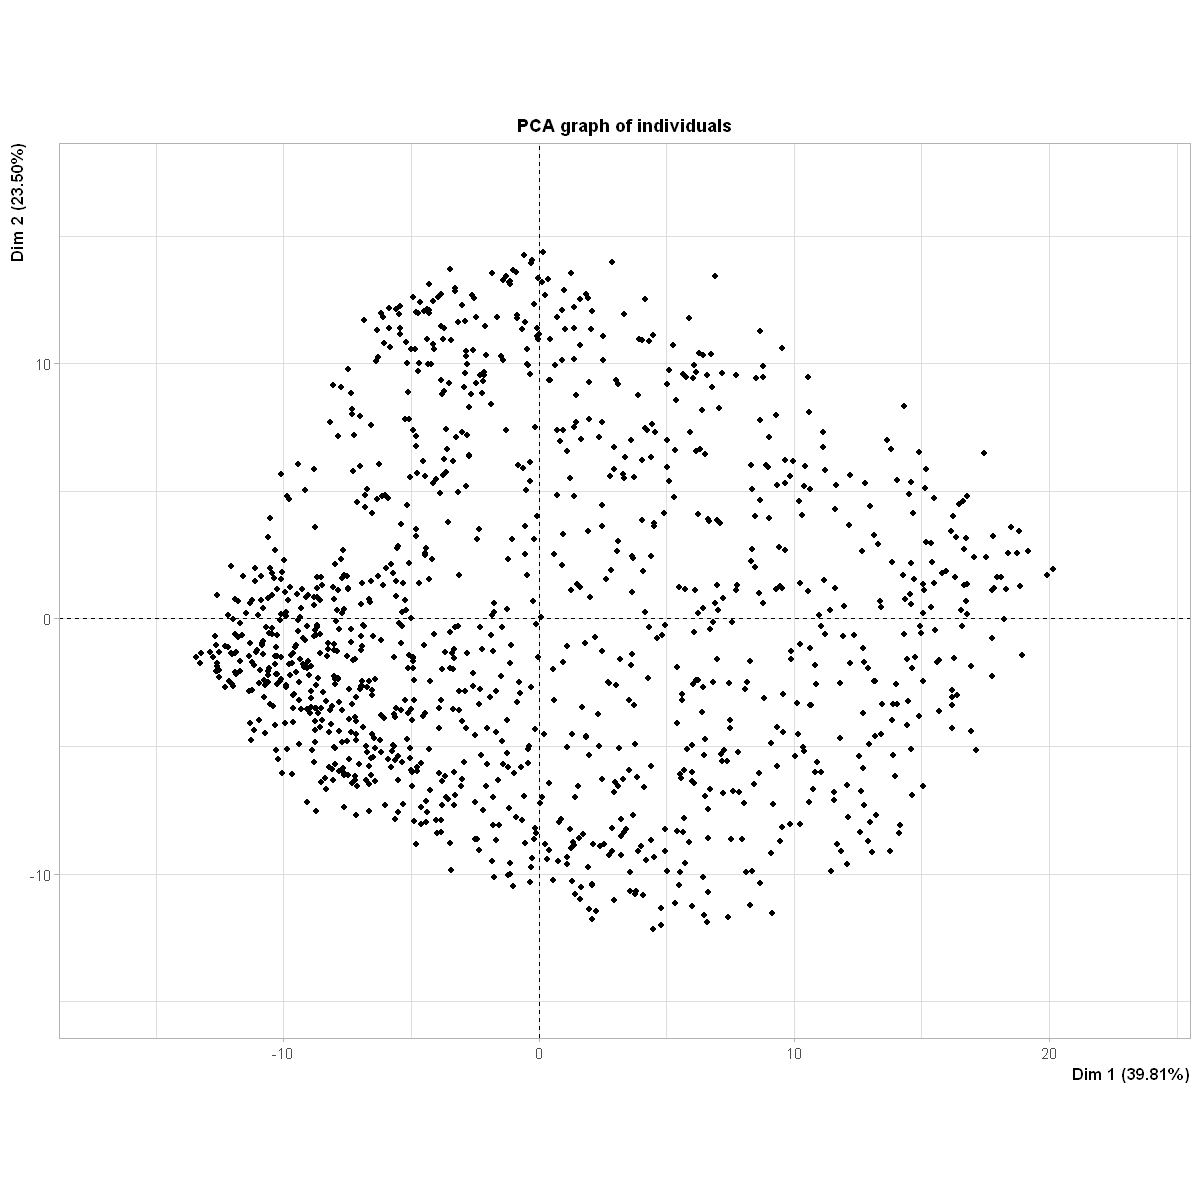

In [8]:
options(repr.plot.width = 10, repr.plot.height = 10)
plot(acp, label = "none")

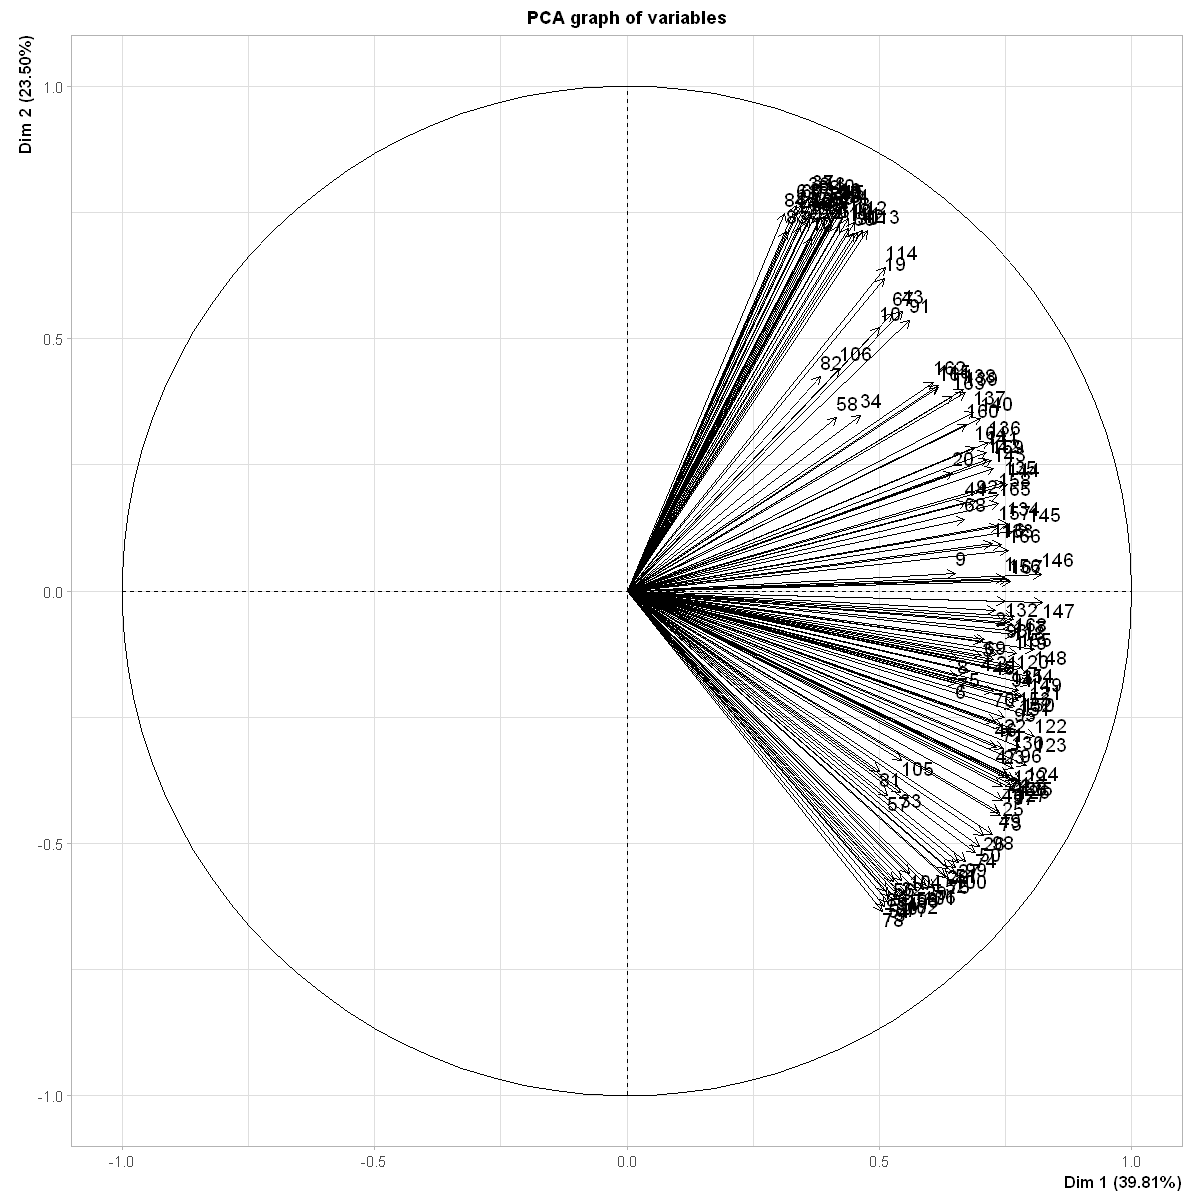

In [9]:
acp <- PCA(x, scale.unit = TRUE, ncp = 12, graph = F)
plot(acp, axes = c(1, 2), choix = "var")

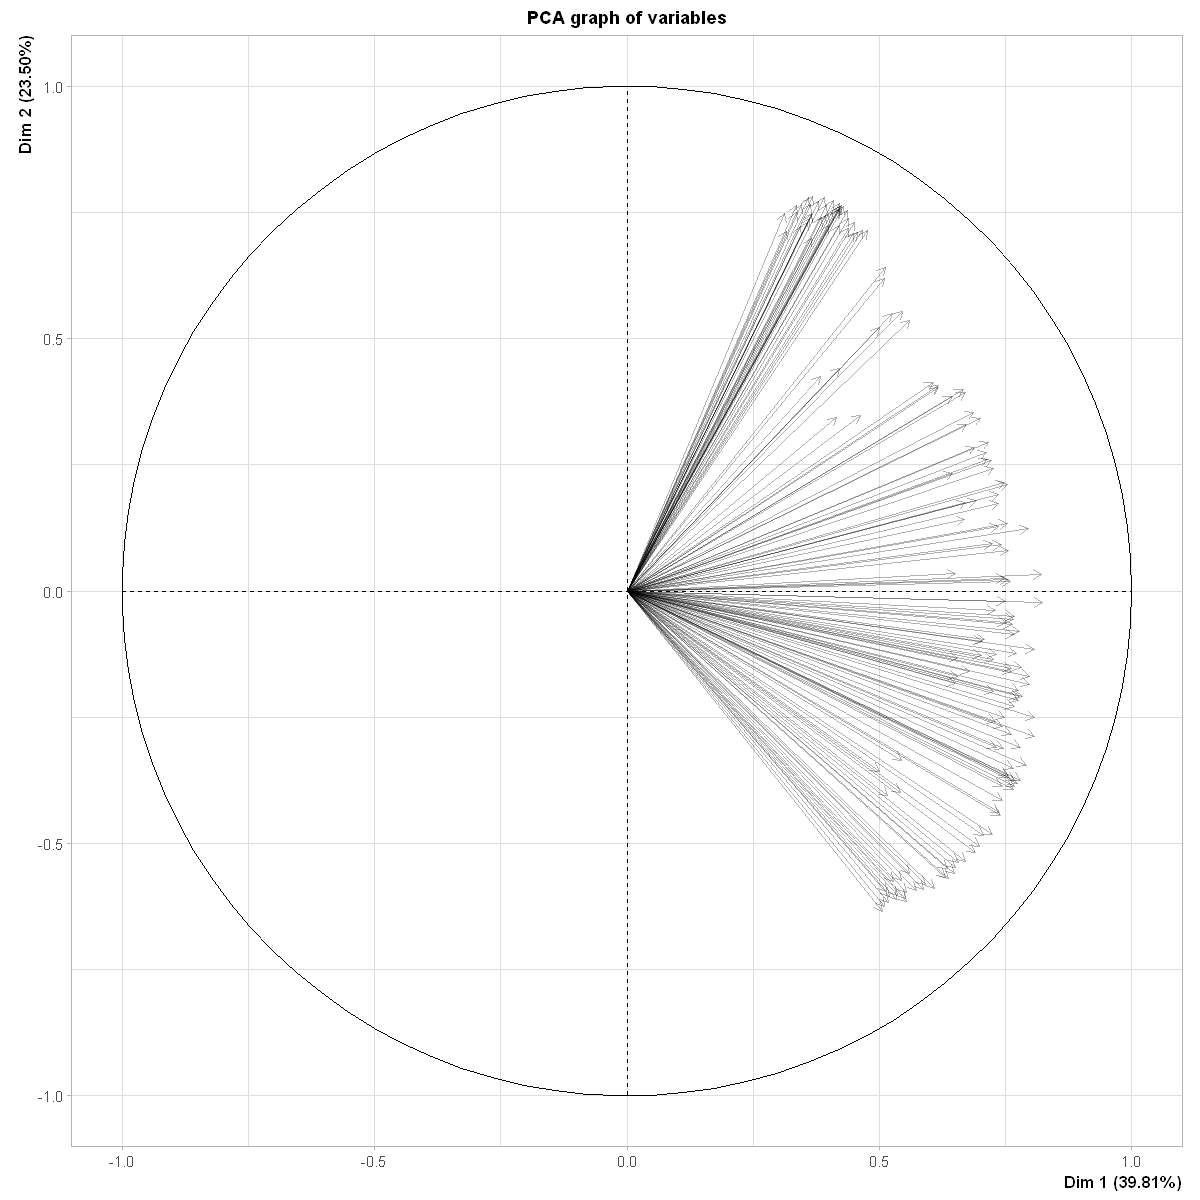

In [10]:
acp <- PCA(x, scale.unit = TRUE, graph = F)
plot(acp, axes = c(1, 2), choix = "var", label = "none")

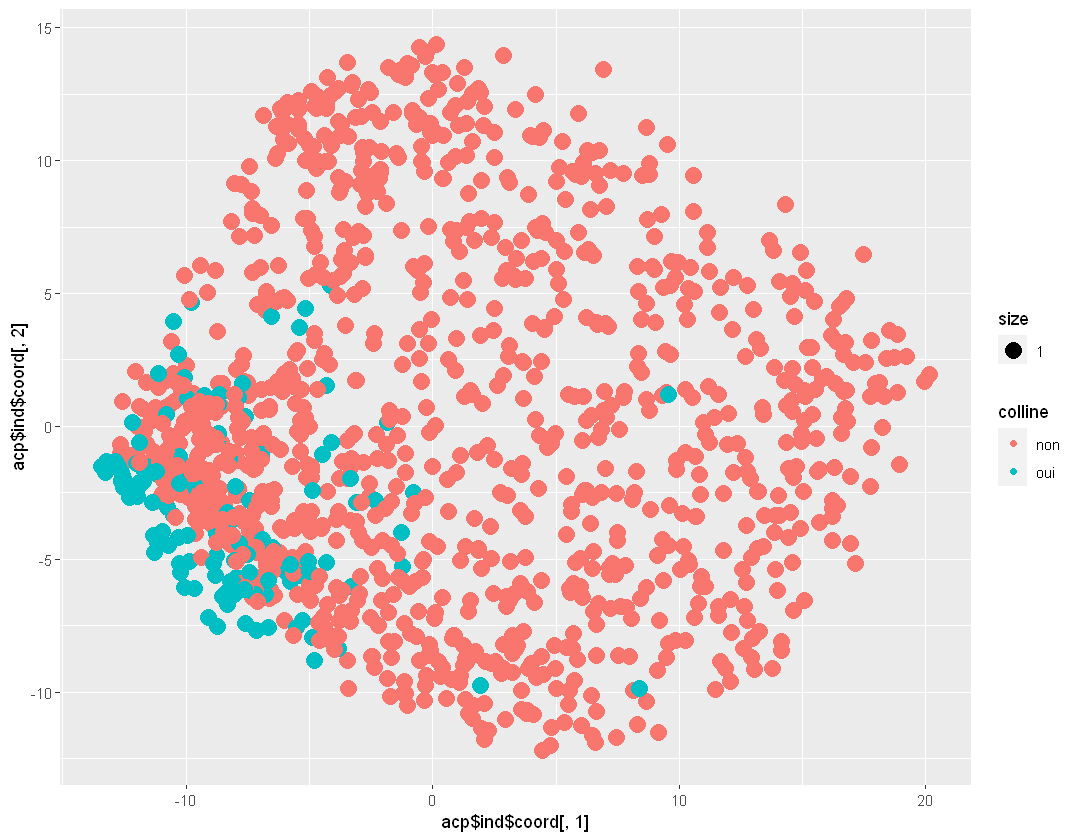

In [11]:
colline <- factor(velib$bonus, labels = c("non", "oui"))
options(repr.plot.width = 9, repr.plot.height = 7)
qplot(acp$ind$coord[,1],acp$ind$coord[,2], color = colline, size = 1)

In [12]:
#acp$ind$coord

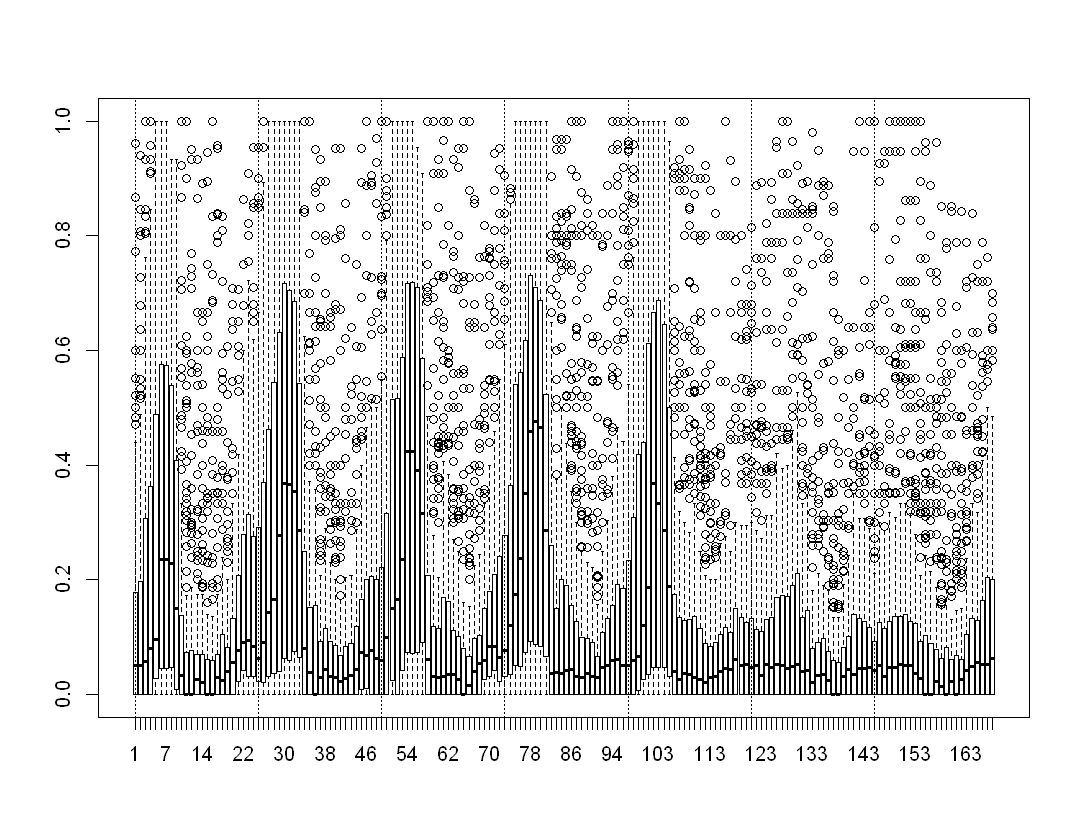

In [13]:
boxplot(subset(x,velib$bonus==1))
timeTick <- 1 + 24*(0:6)
for (k in 1:16){
    abline(v = timeTick, lty = "dotted")
}

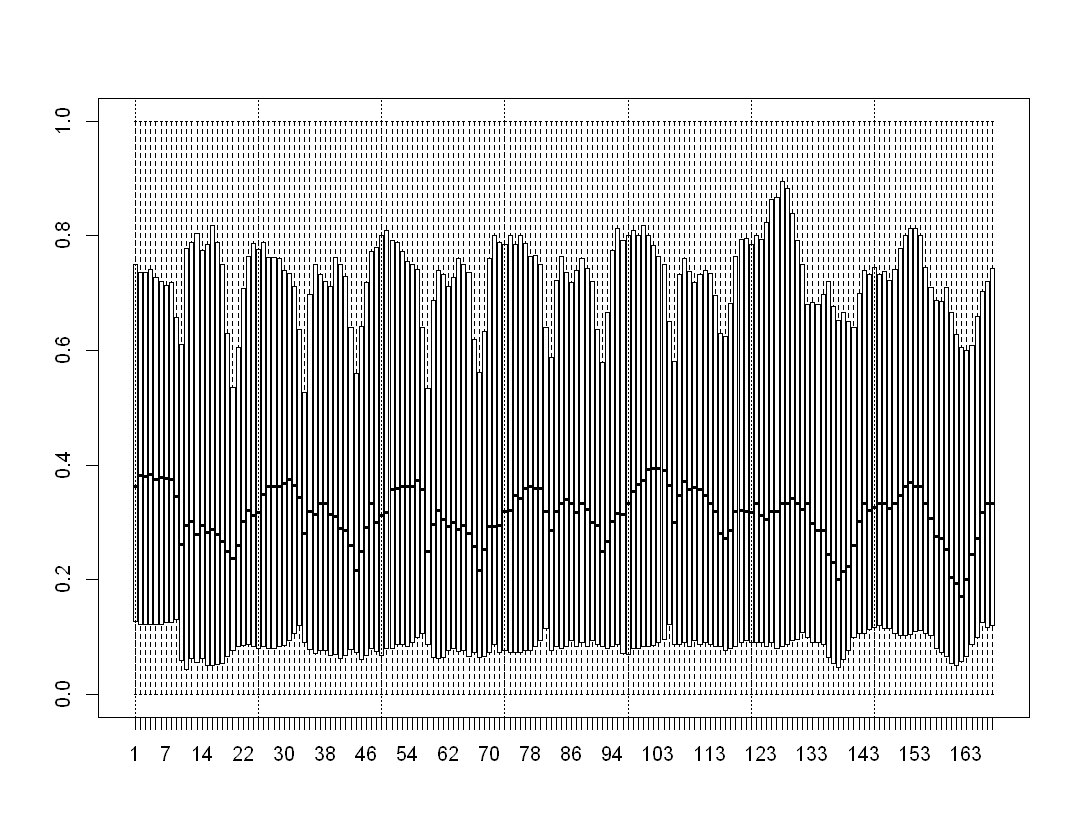

In [14]:
boxplot(subset(x,velib$bonus==0))
for (k in 1:16){
    abline(v = timeTick, lty = "dotted")
}

## Clustering hiérarchique

In [15]:
data_scaled <- scale(x)

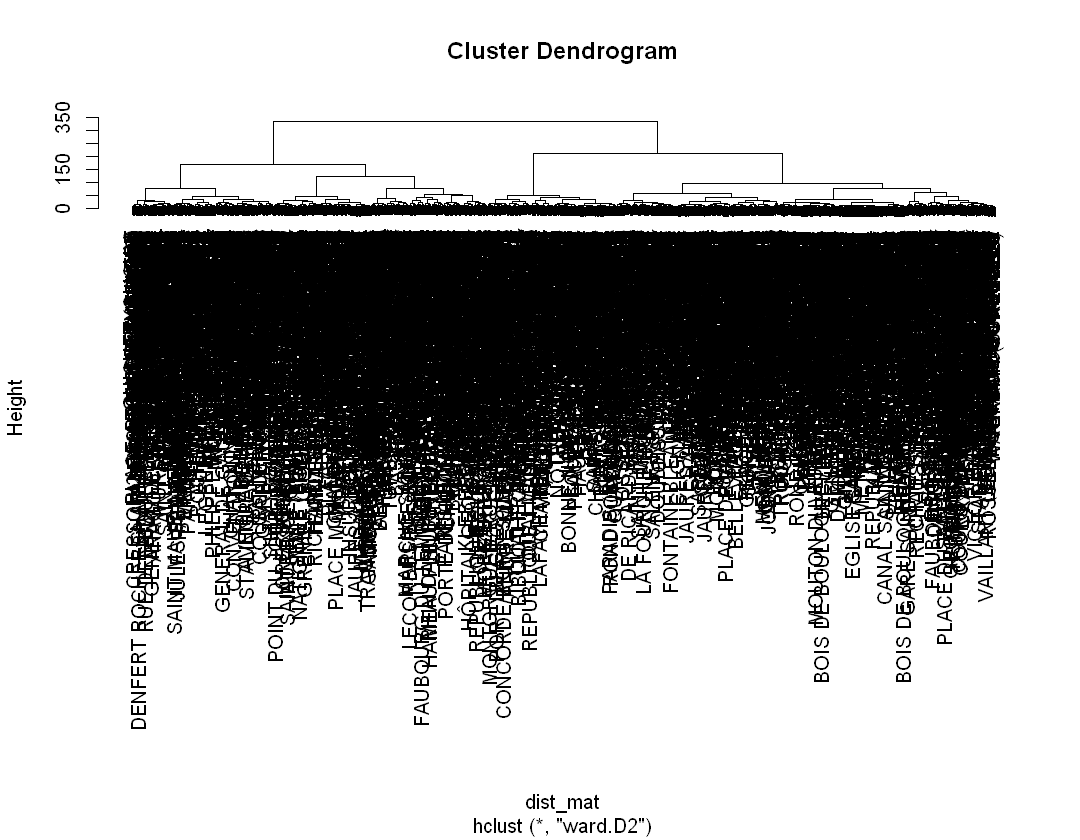

In [16]:
dist_mat <- dist(data_scaled, method = 'euclidean')

hclust_avg <- hclust(dist_mat, method = 'ward.D2')
plot(hclust_avg)

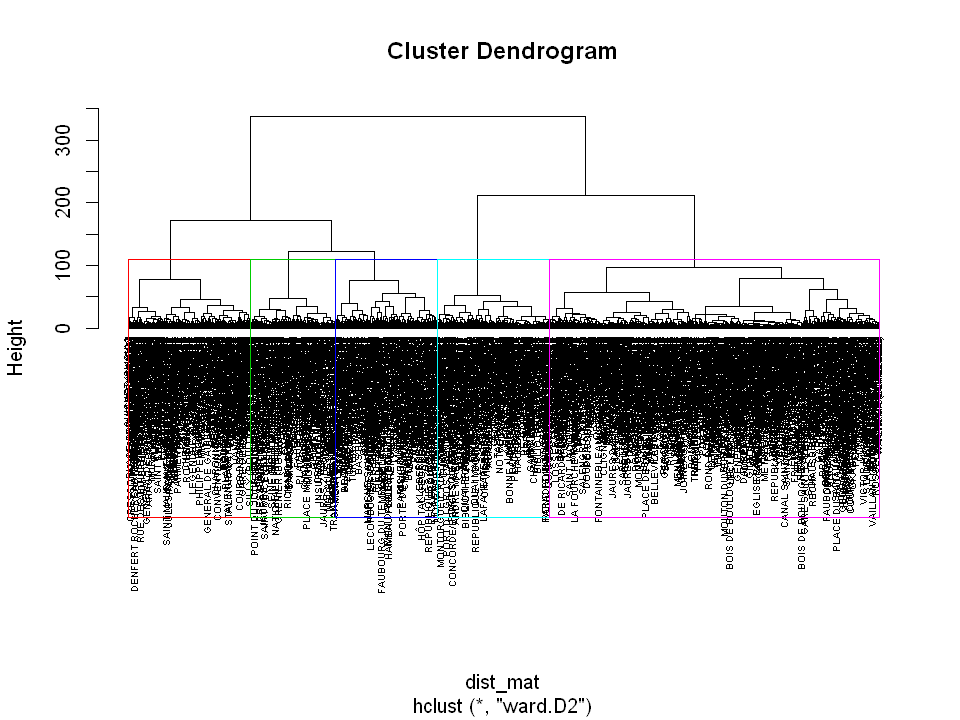

In [72]:
options(repr.plot.width = 8, repr.plot.height = 6)
cut_avg <- cutree(hclust_avg, k = 5)
plot(hclust_avg, hang = -1, cex=0.5)
rect.hclust(hclust_avg , k = 5, border = 2:6)
#abline(h = 3, col = 'red')

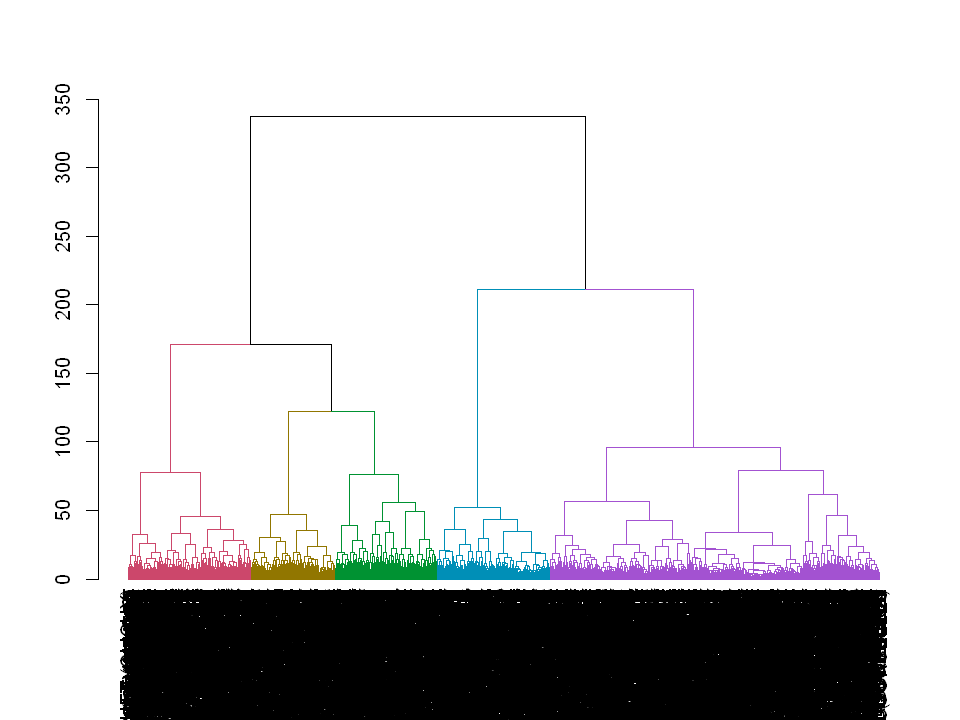

In [73]:
suppressPackageStartupMessages(library(dendextend))
avg_dend_obj <- as.dendrogram(hclust_avg)
avg_col_dend <- color_branches(avg_dend_obj, k = 5)
plot(avg_col_dend)

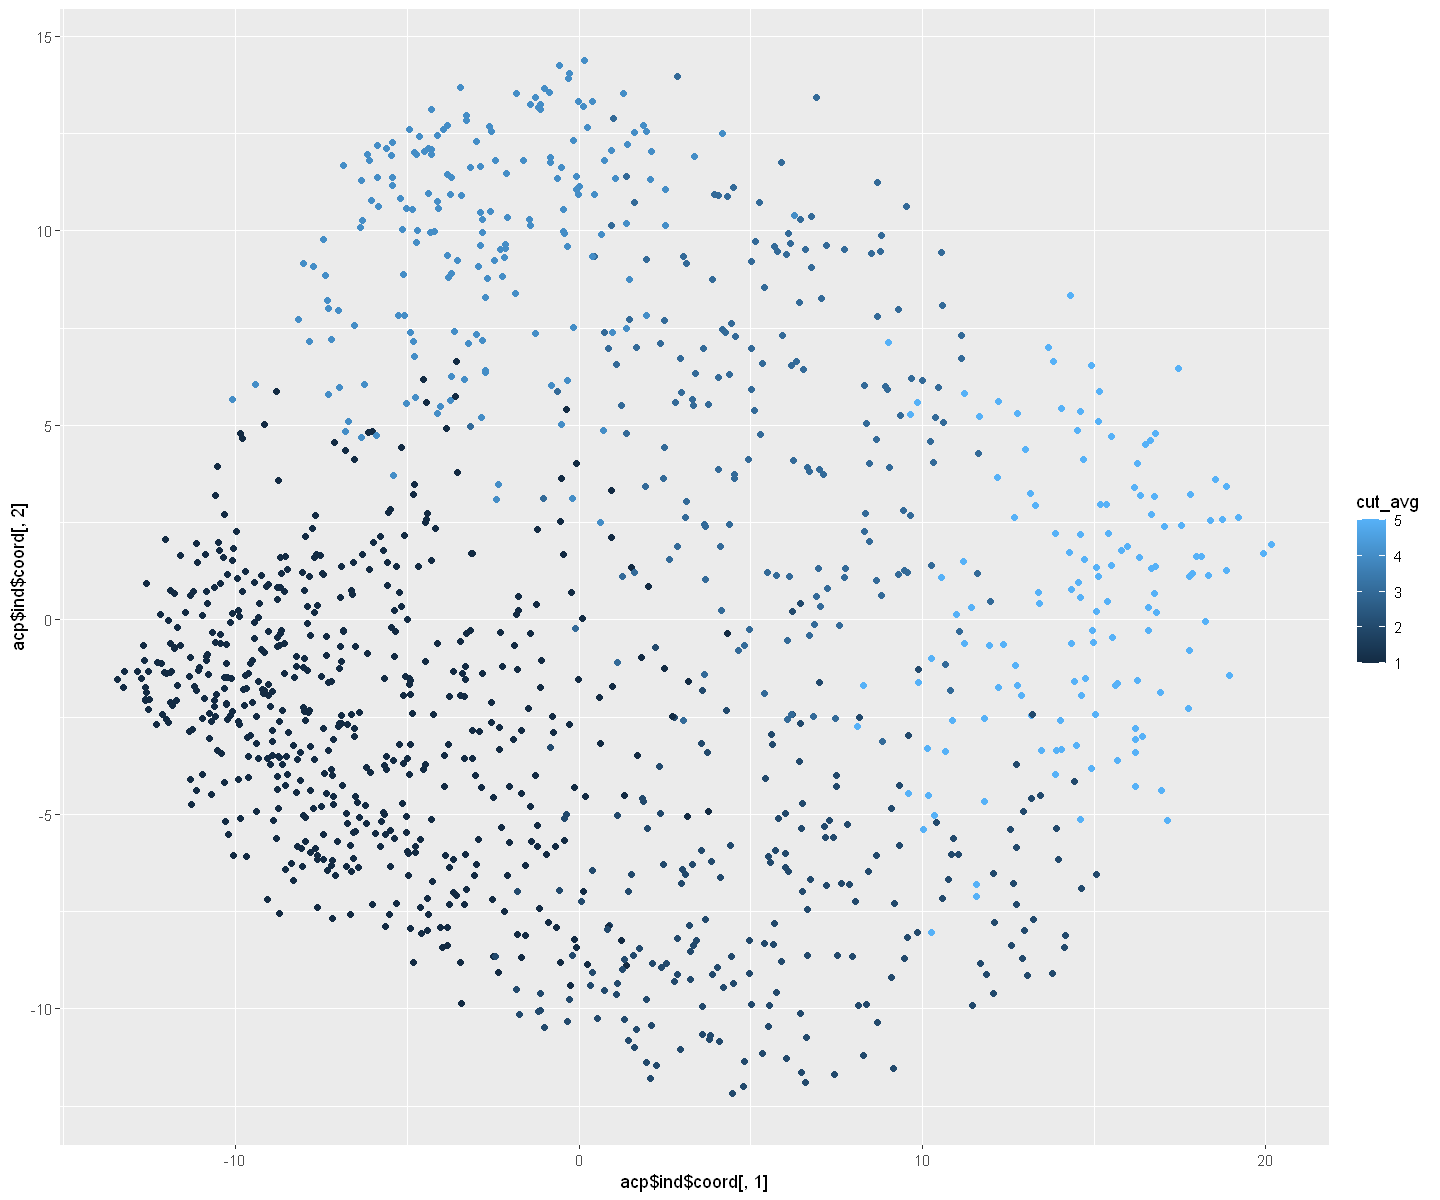

In [19]:
options(repr.plot.width = 12, repr.plot.height = 10)
qplot(acp$ind$coord[,1],acp$ind$coord[,2], color = cut_avg )

In [20]:
acp <- PCA(velib$data, ncp = 5, graph = FALSE)
res.hcpc <- HCPC(acp, graph = FALSE,nb.clust=5)

Warning message:
"`guides(<scale> = FALSE)` is deprecated. Please use `guides(<scale> = "none")` instead."

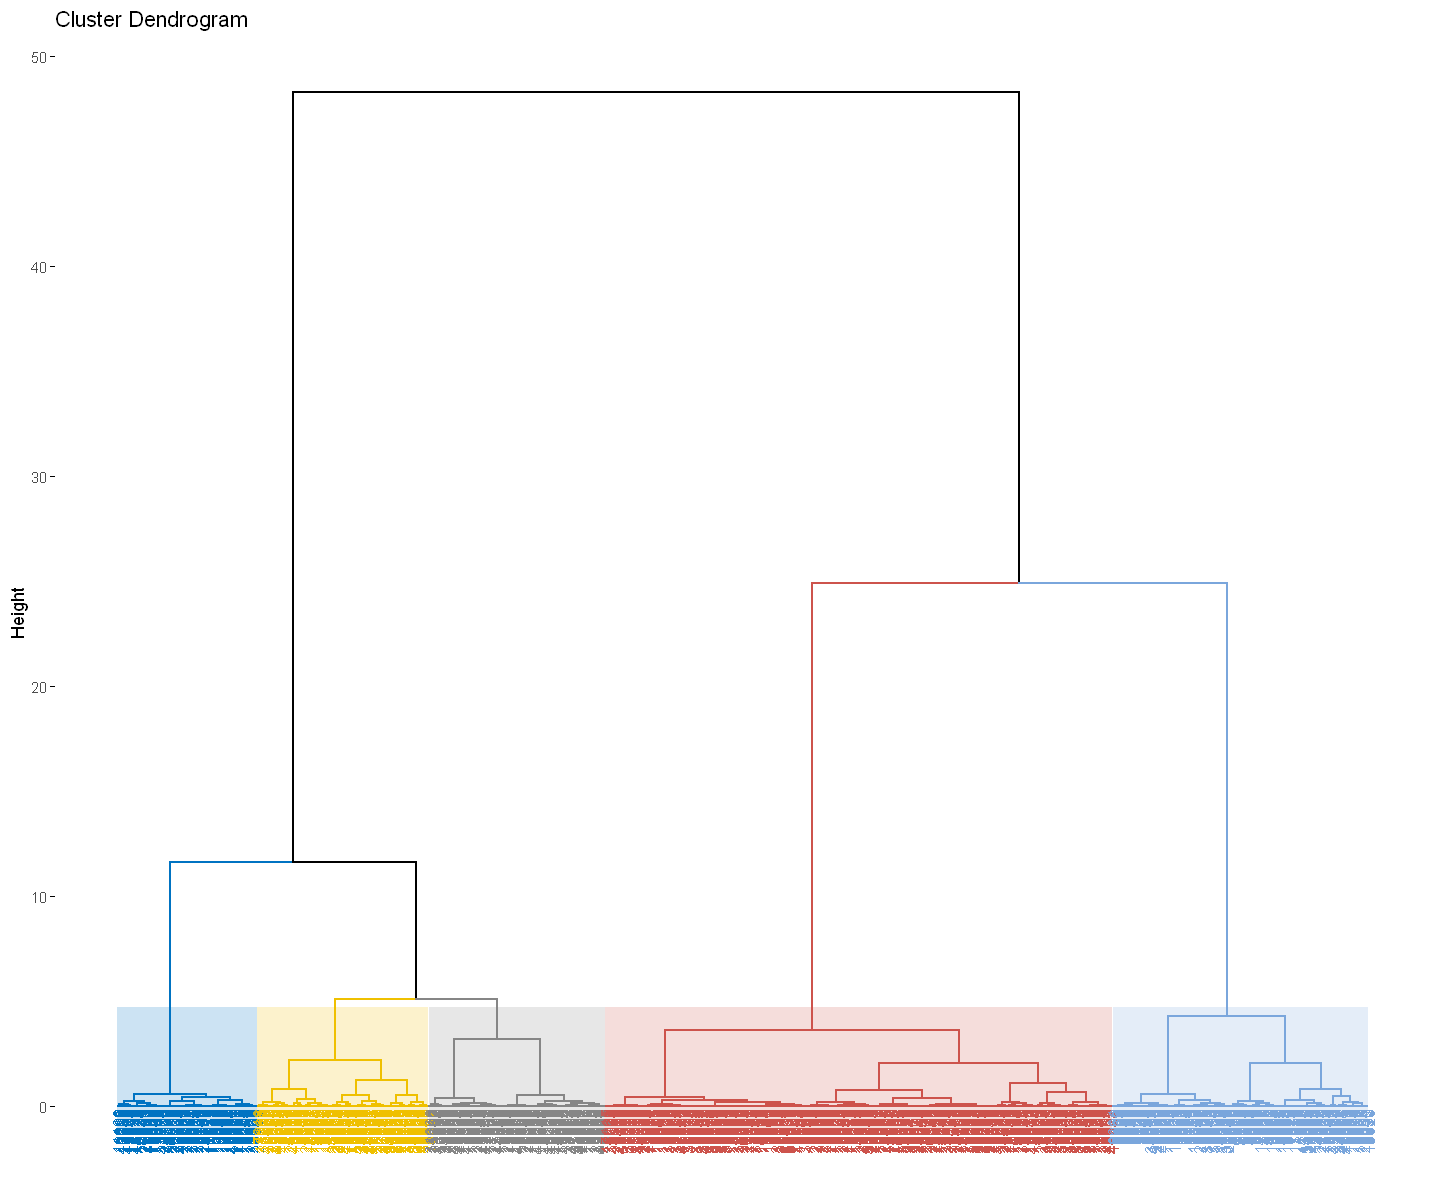

In [21]:
fviz_dend(res.hcpc, k=5, 
          cex = 0.7,                     # Taille du text
          palette = "jco",               # Palette de couleur ?ggpubr::ggpar
          rect = TRUE, rect_fill = TRUE, # Rectangle autour des groupes
          rect_border = "jco",           # Couleur du rectangle
          labels_track_height = 0.8      # Augmente l'espace pour le texte
          )

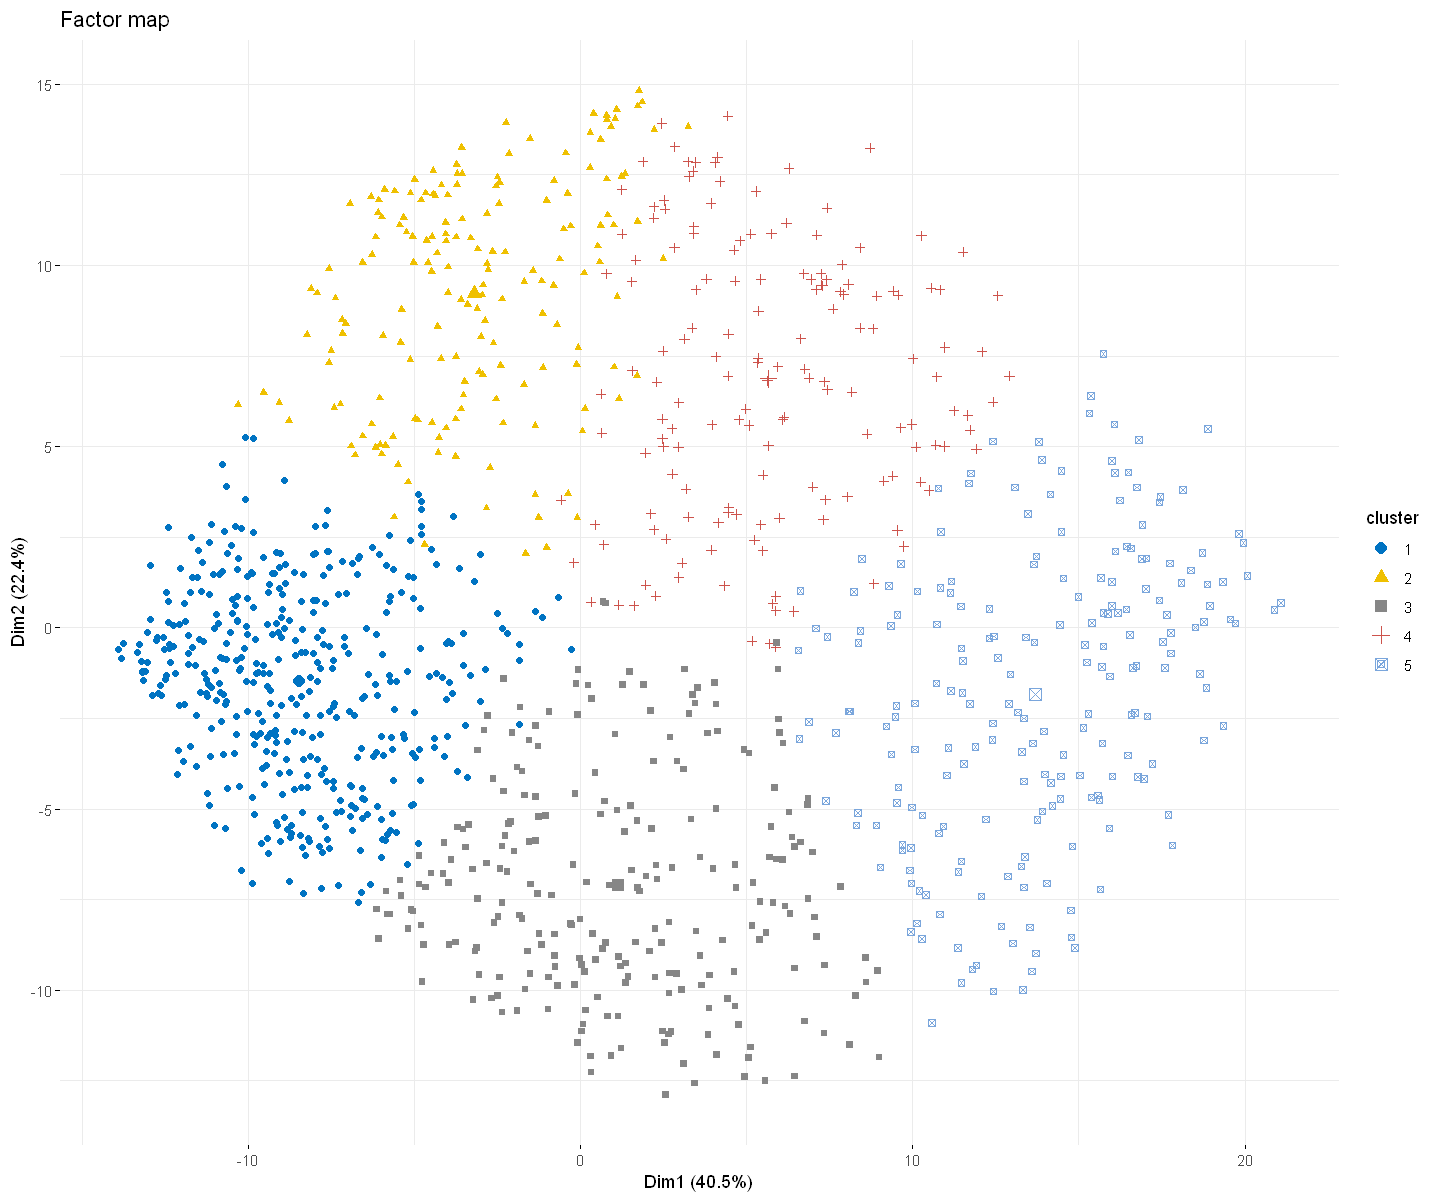

In [22]:
fviz_cluster(res.hcpc,
             repel = TRUE,
             palette = "jco",
             ellipse = FALSE,
             ggtheme = theme_minimal(),
             main = "Factor map",
             geom = "point"
             )

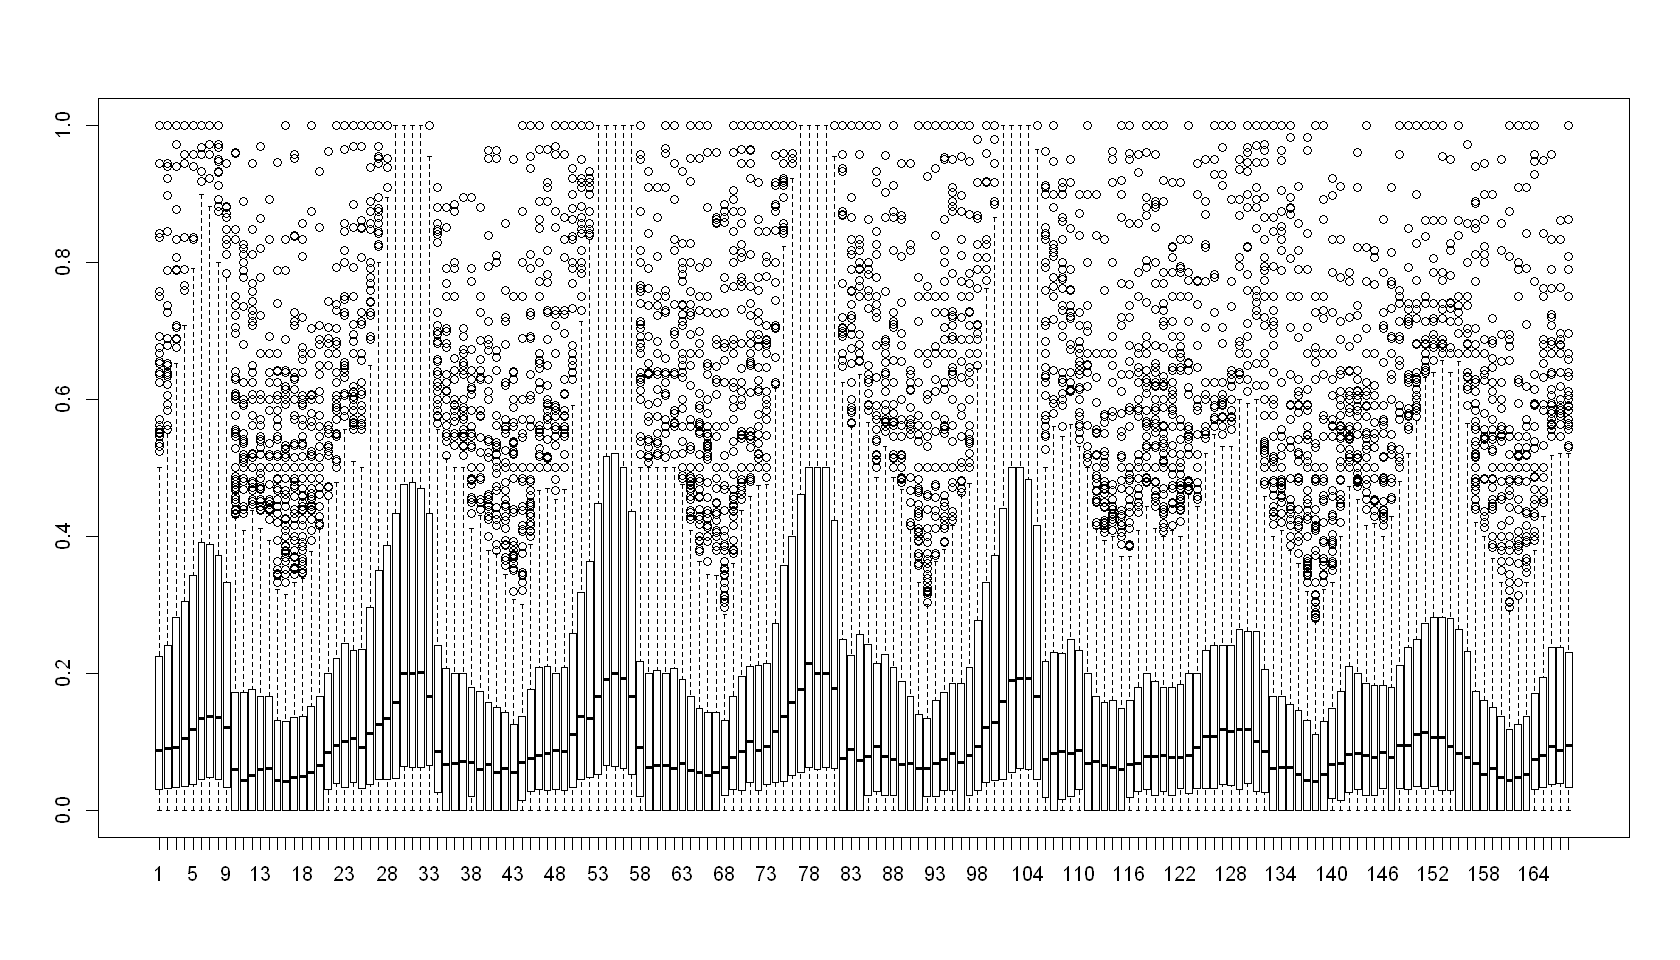

In [23]:
options(repr.plot.width = 14, repr.plot.height = 8)
boxplot(x[which(res.hcpc$data.clust$clust == 1),])

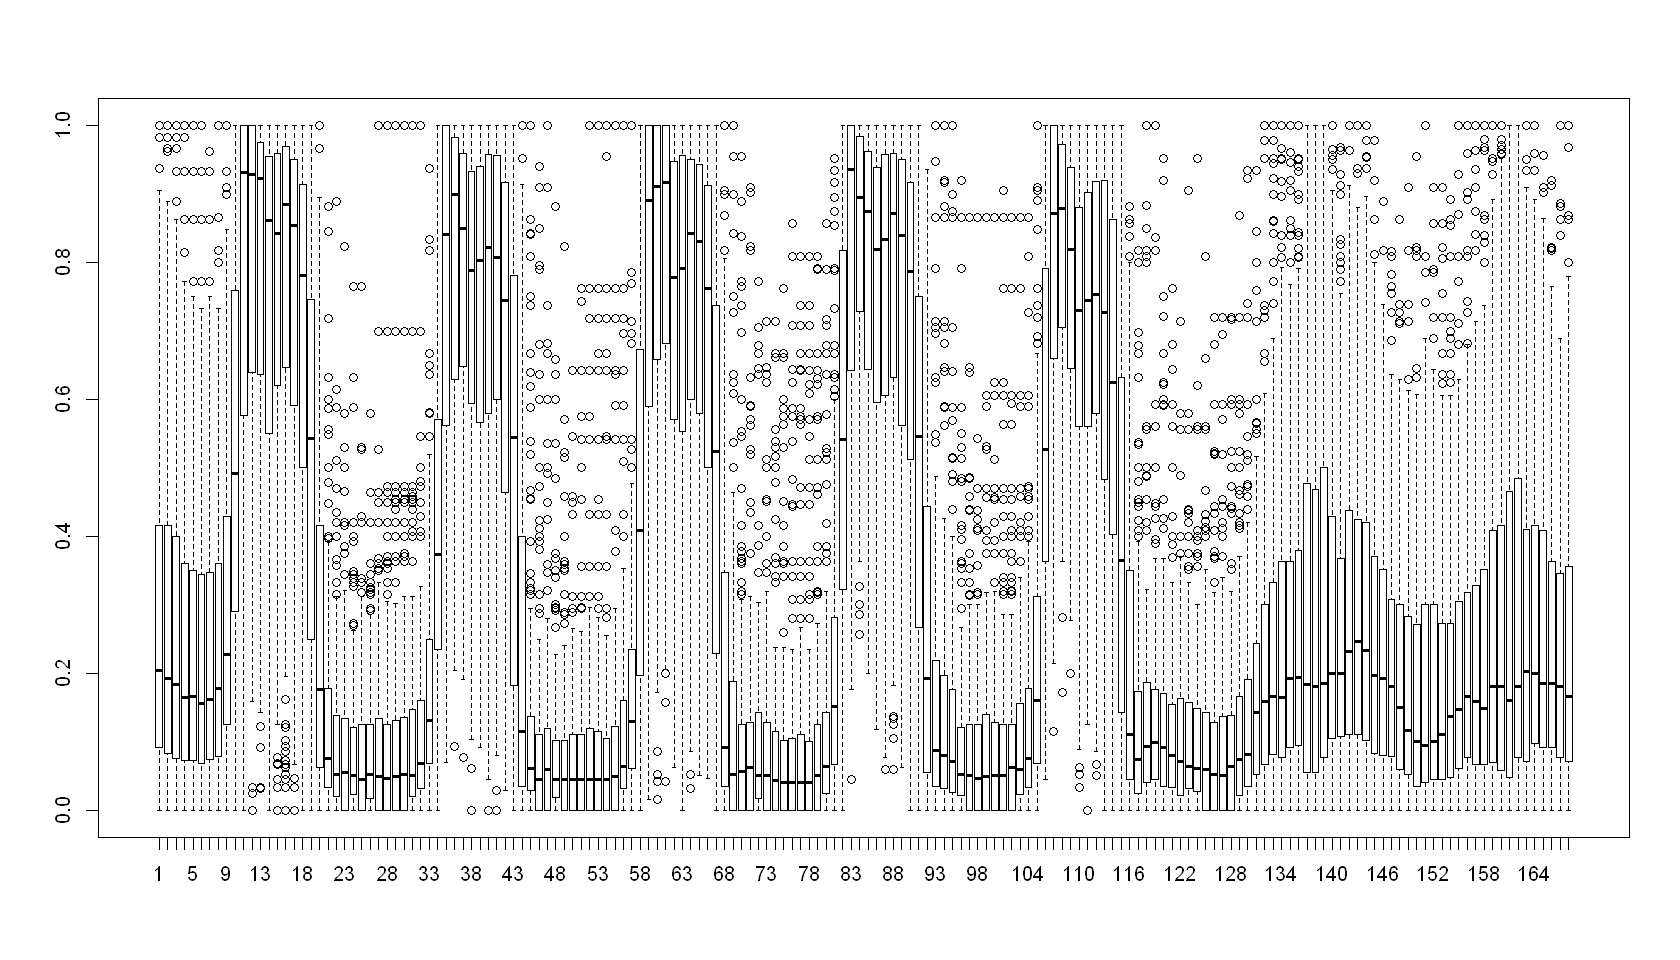

In [24]:
boxplot(x[which(res.hcpc$data.clust$clust == 2),])

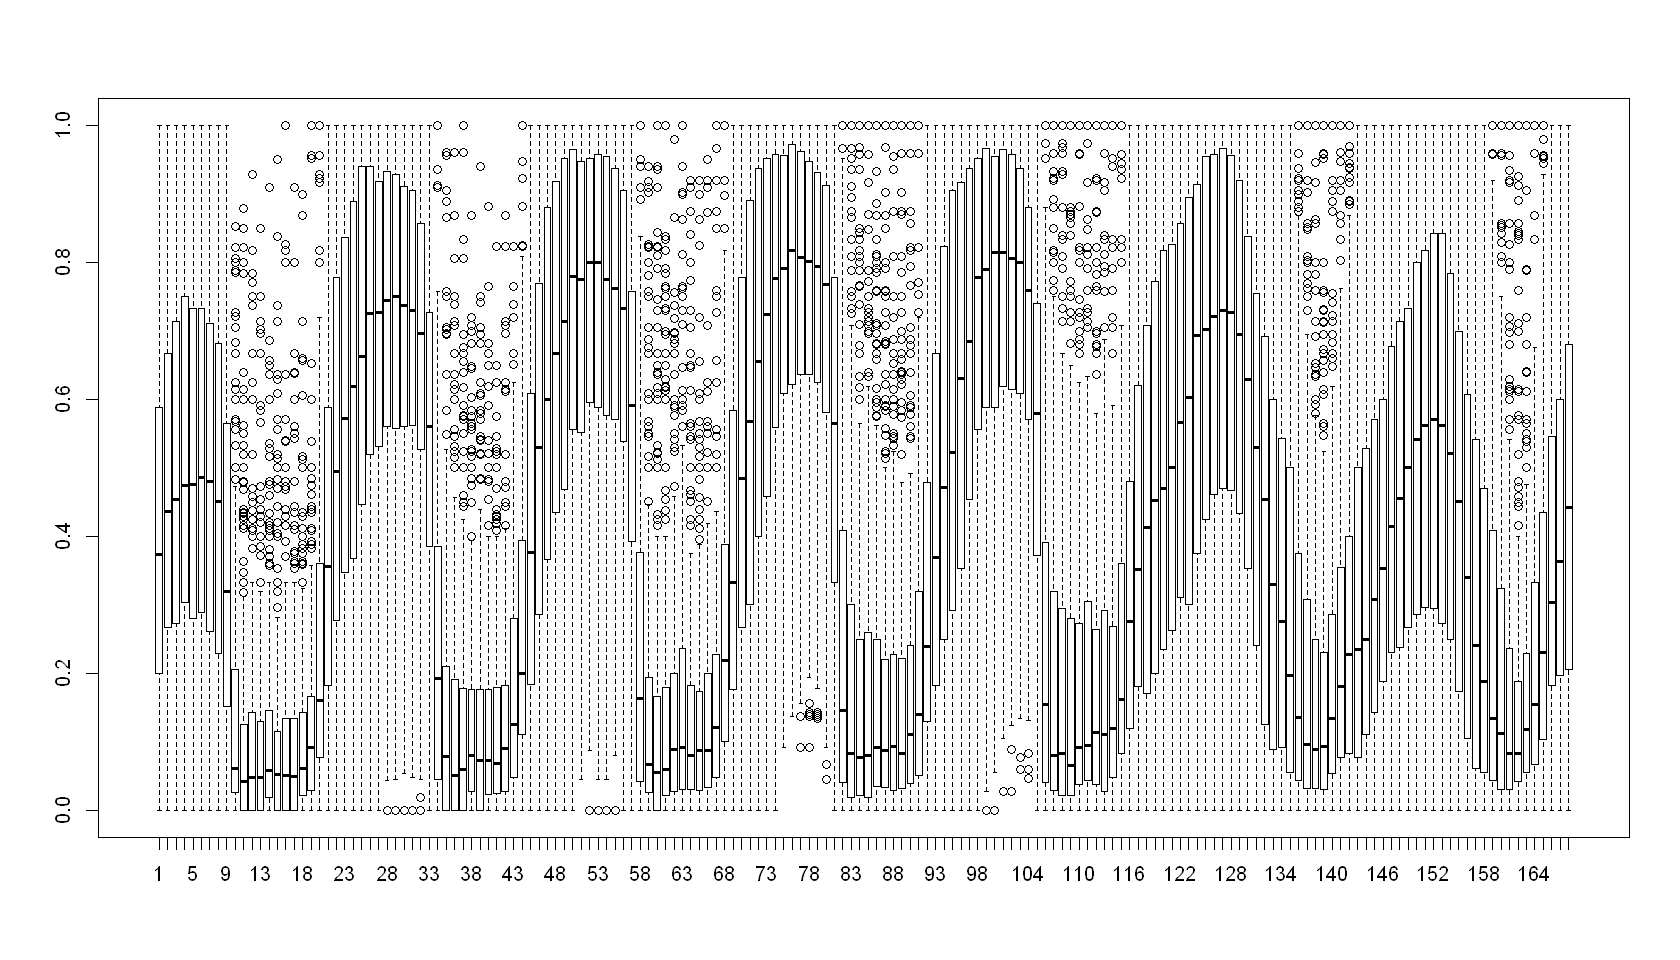

In [25]:
boxplot(x[which(res.hcpc$data.clust$clust == 3),])

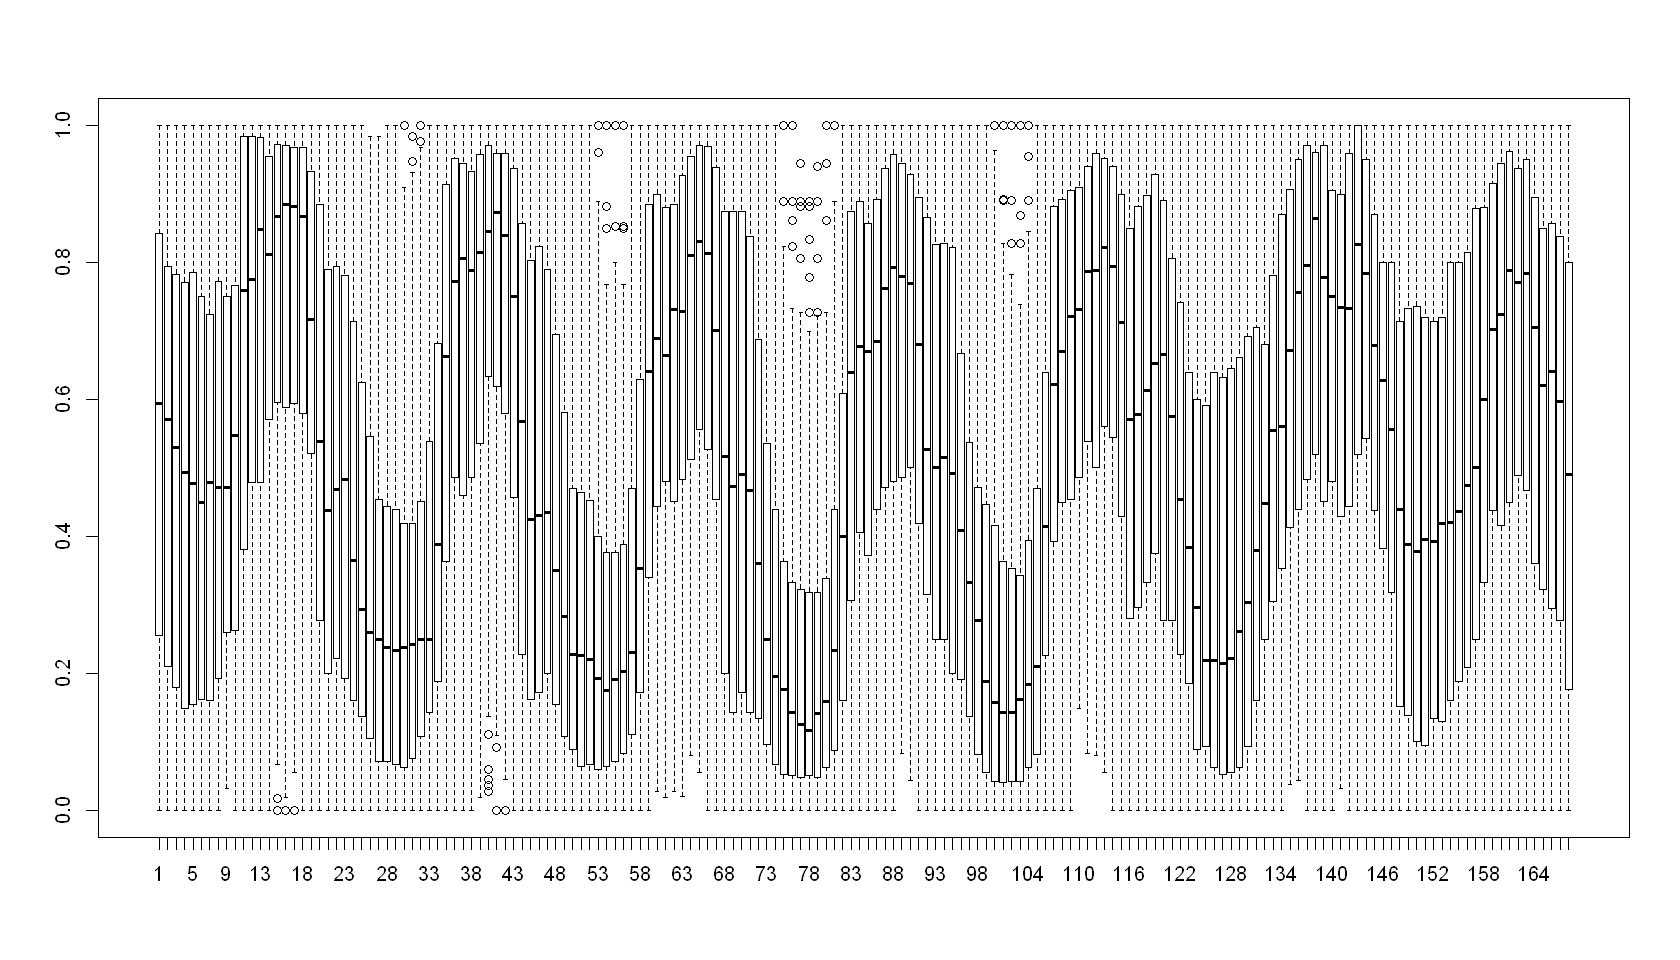

In [26]:
boxplot(x[which(res.hcpc$data.clust$clust == 4),])

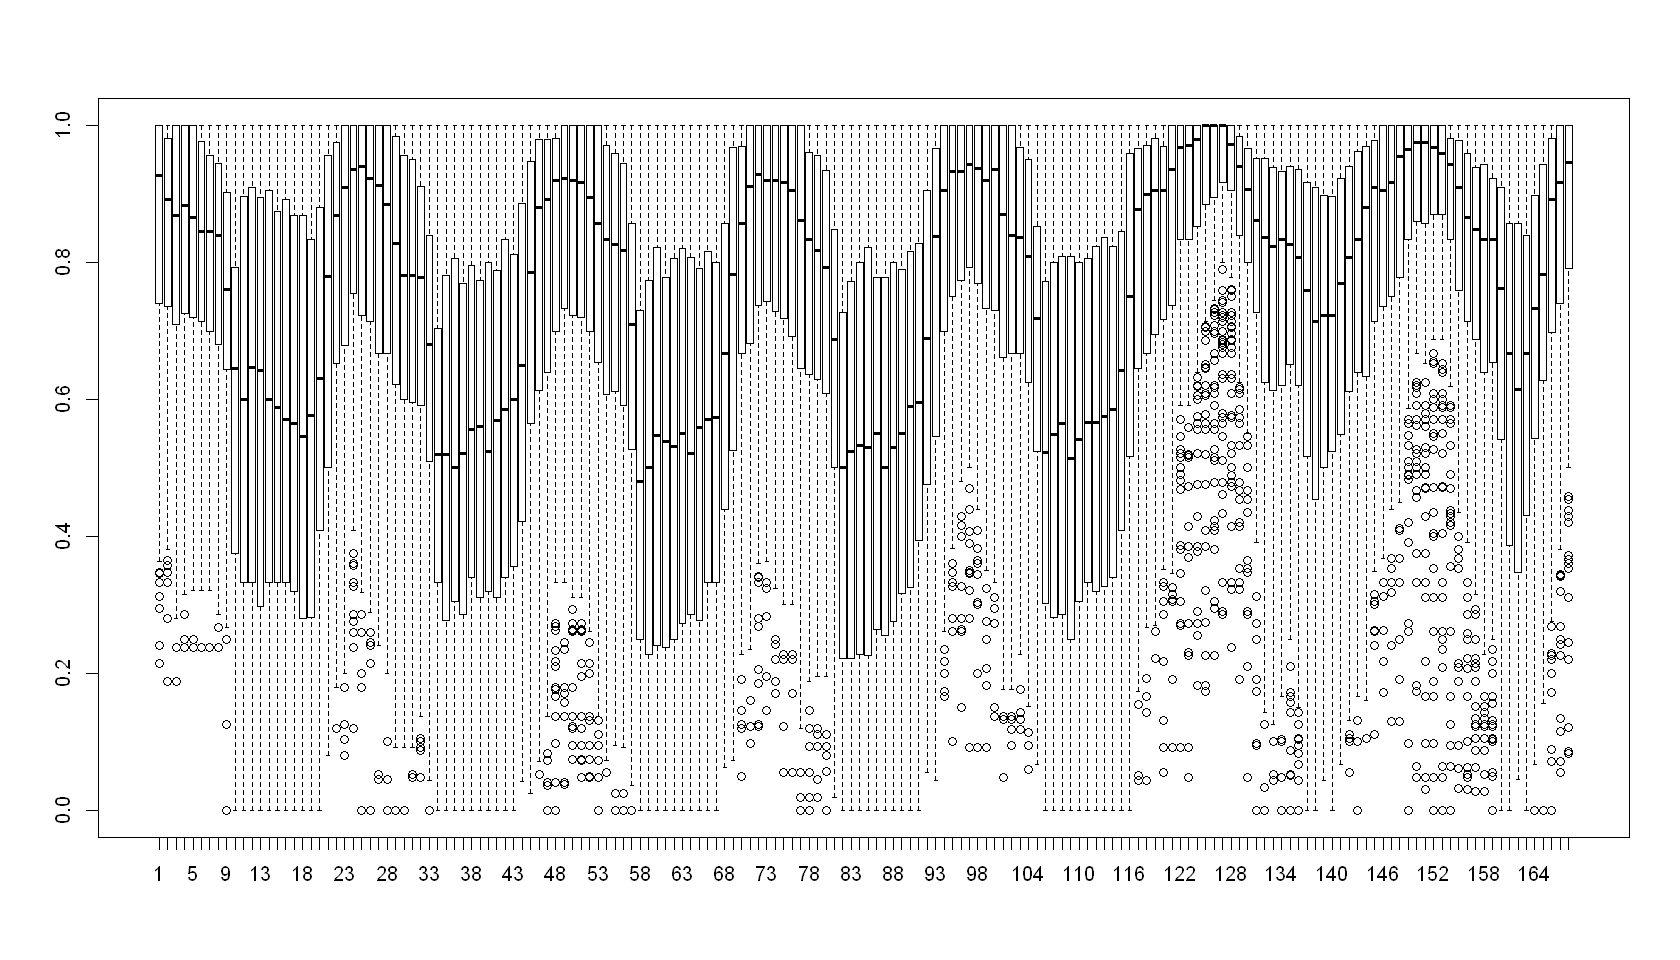

In [27]:
boxplot(x[which(res.hcpc$data.clust$clust == 5),])

## Kmeans

In [28]:
#make this example reproducible
set.seed(1)

#perform k-means clustering with k = 4 clusters
km <- kmeans(x, centers = 5, nstart = 15)

#view results
km

K-means clustering with 5 clusters of sizes 153, 229, 423, 195, 189

Cluster means:
          1         2         3         4         5         6         7
1 0.5778824 0.5449434 0.5157677 0.5089357 0.4989090 0.4946776 0.4986154
2 0.4505469 0.4822699 0.5011060 0.5155005 0.5113004 0.5049307 0.4915184
3 0.1663916 0.1843017 0.2026117 0.2080986 0.2305078 0.2557580 0.2561086
4 0.3085065 0.3053301 0.2917294 0.2813156 0.2676824 0.2572598 0.2616888
5 0.8214482 0.8185838 0.8109777 0.8191936 0.8087354 0.8025150 0.7989631
          8         9        10        11        12        13        14
1 0.5061619 0.5080167 0.5160569 0.6295114 0.6633466 0.6726564 0.6852014
2 0.4699363 0.3639867 0.1553905 0.1156897 0.1168107 0.1069543 0.1199595
3 0.2523815 0.2225347 0.1388944 0.1264016 0.1309696 0.1252150 0.1187304
4 0.2750472 0.3207655 0.5311941 0.7953984 0.8154528 0.8127822 0.7632686
5 0.7875767 0.7386116 0.5879982 0.5850573 0.5968896 0.5824541 0.5898608
         15        16        17        18        19 

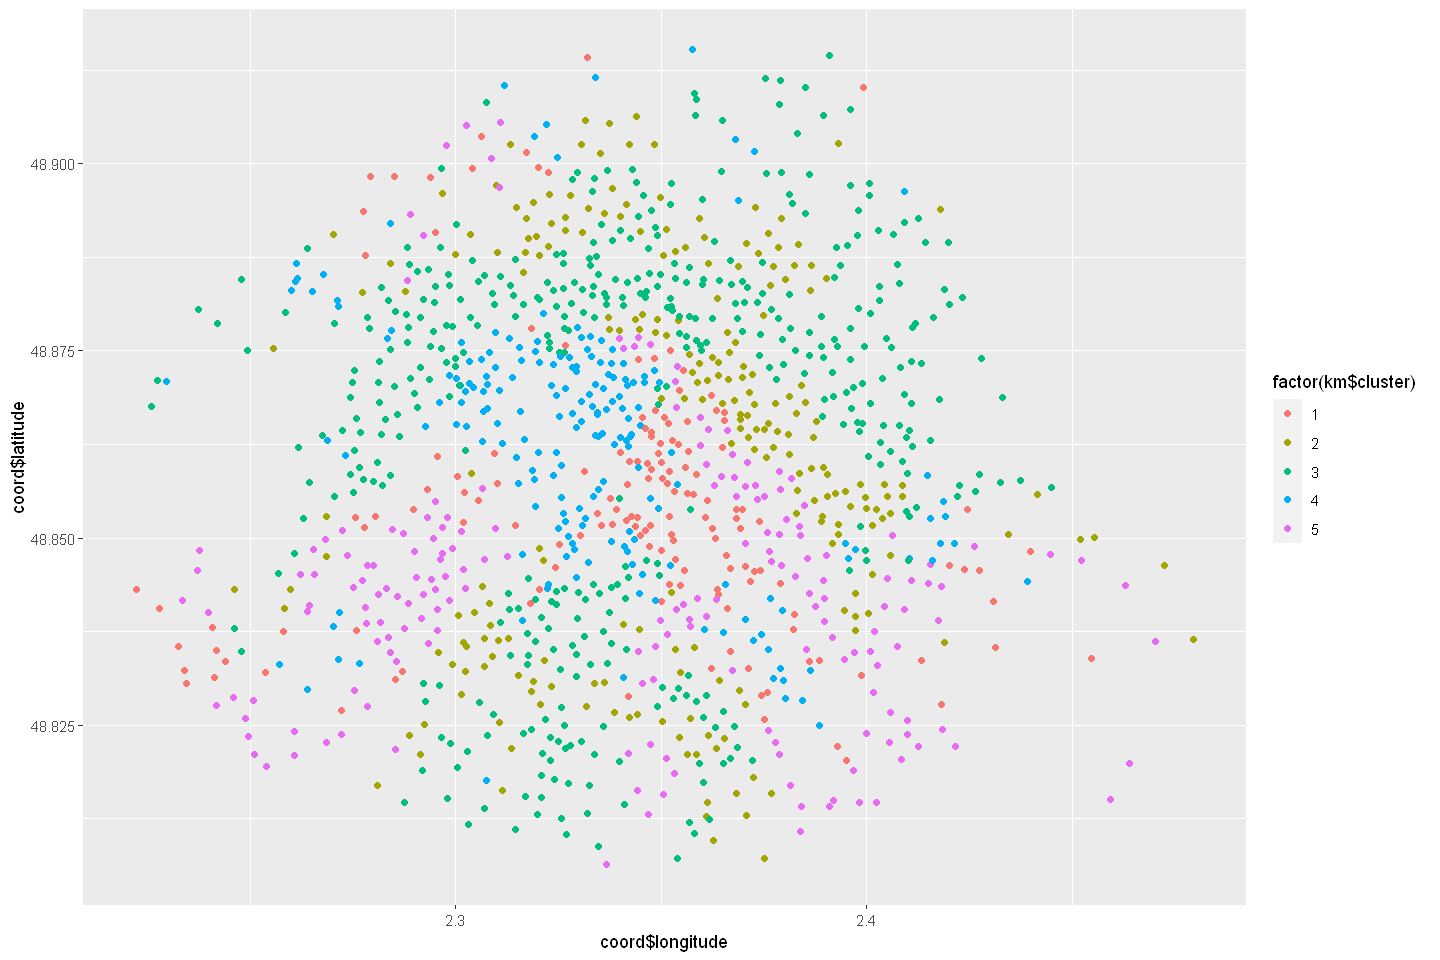

In [58]:
options(repr.plot.width = 12,repr.plot.heigth = 4)
qplot(coord$longitude,coord$latitude, color = factor(km$cluster))  

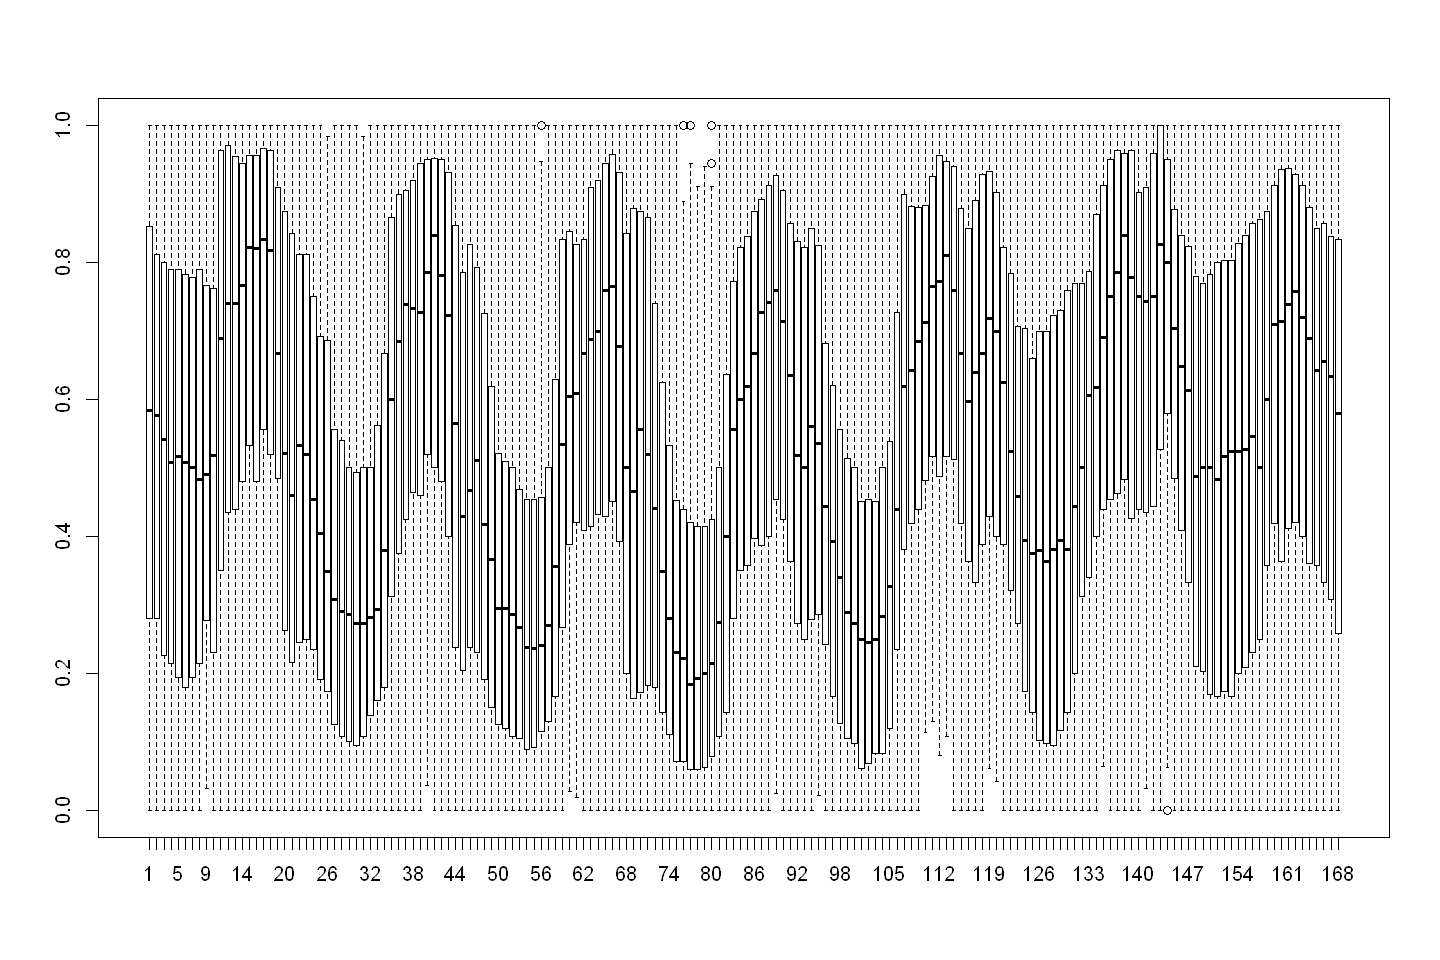

In [59]:
boxplot(x[which(km$cluster == 1),])

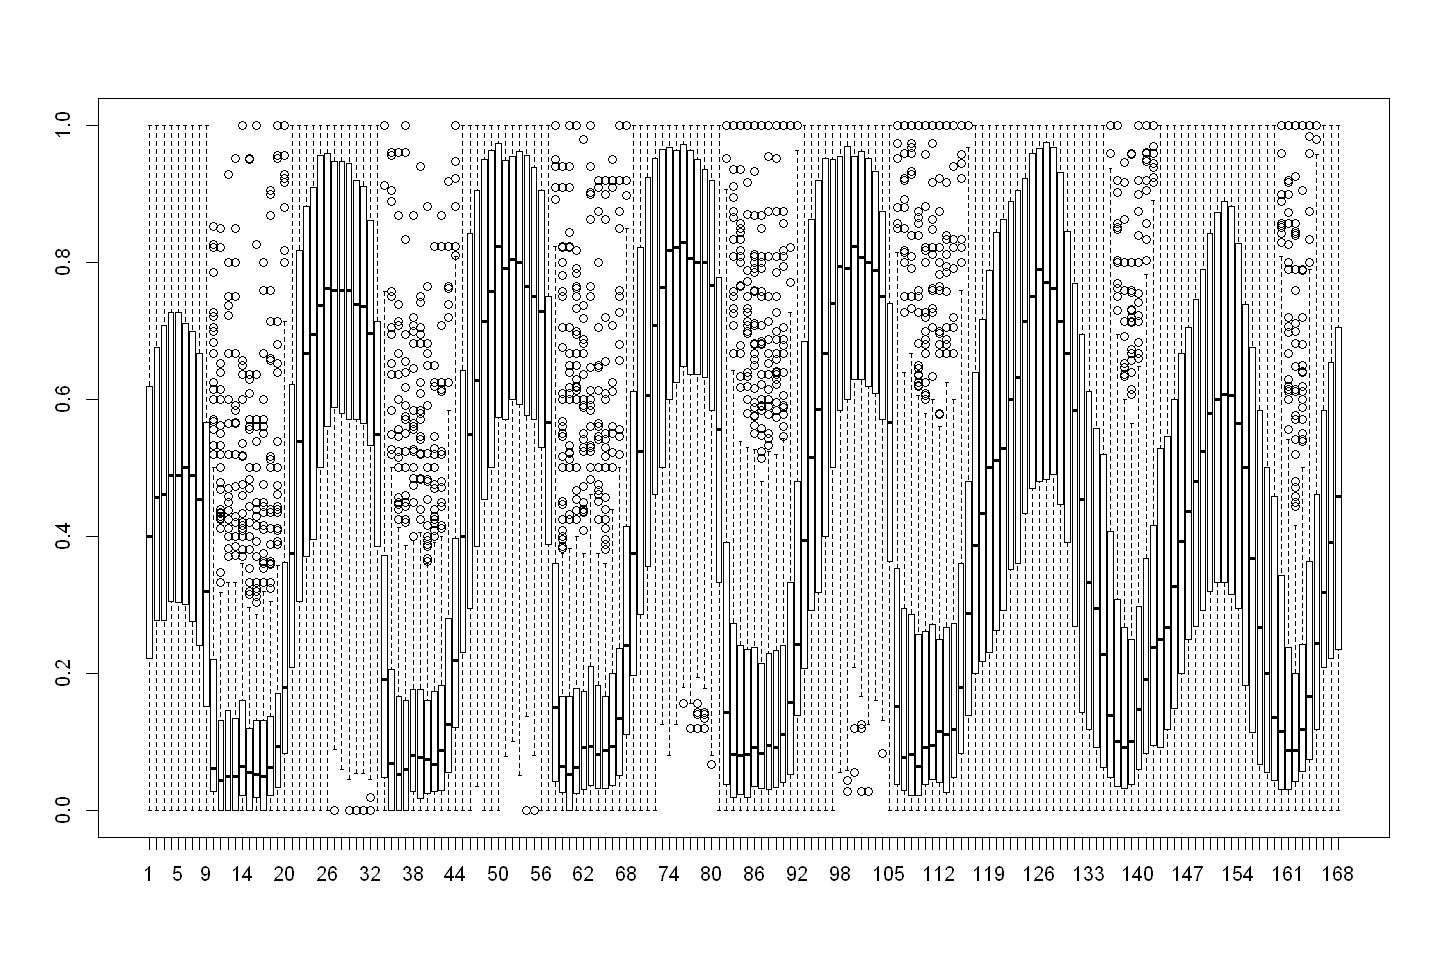

In [60]:
boxplot(x[which(km$cluster == 2),])

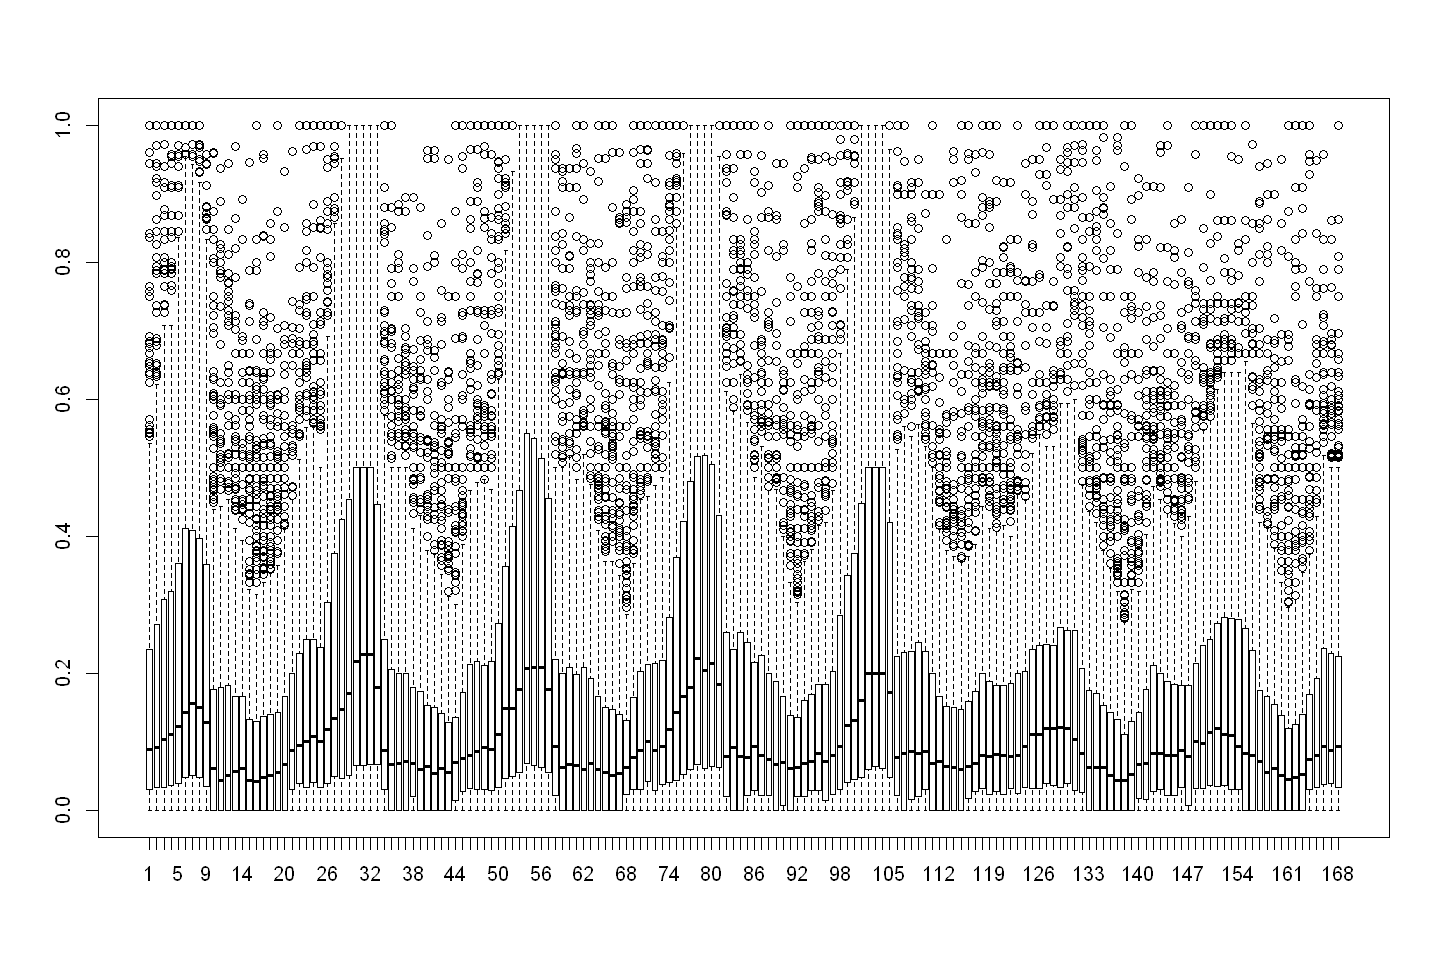

In [61]:
boxplot(x[which(km$cluster == 3),])

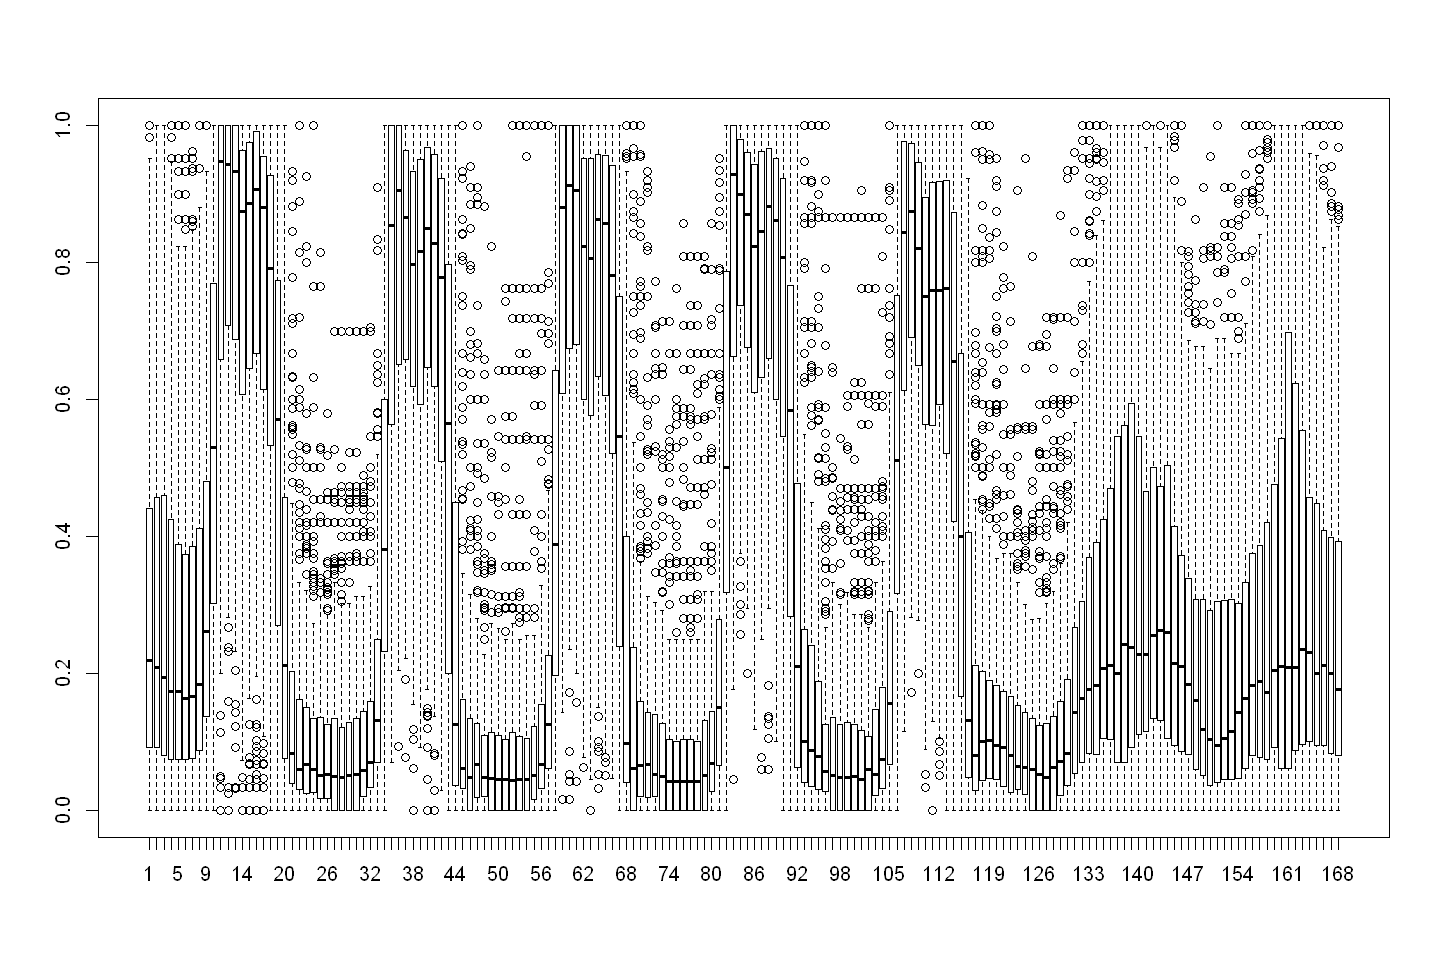

In [62]:
boxplot(x[which(km$cluster == 4),])

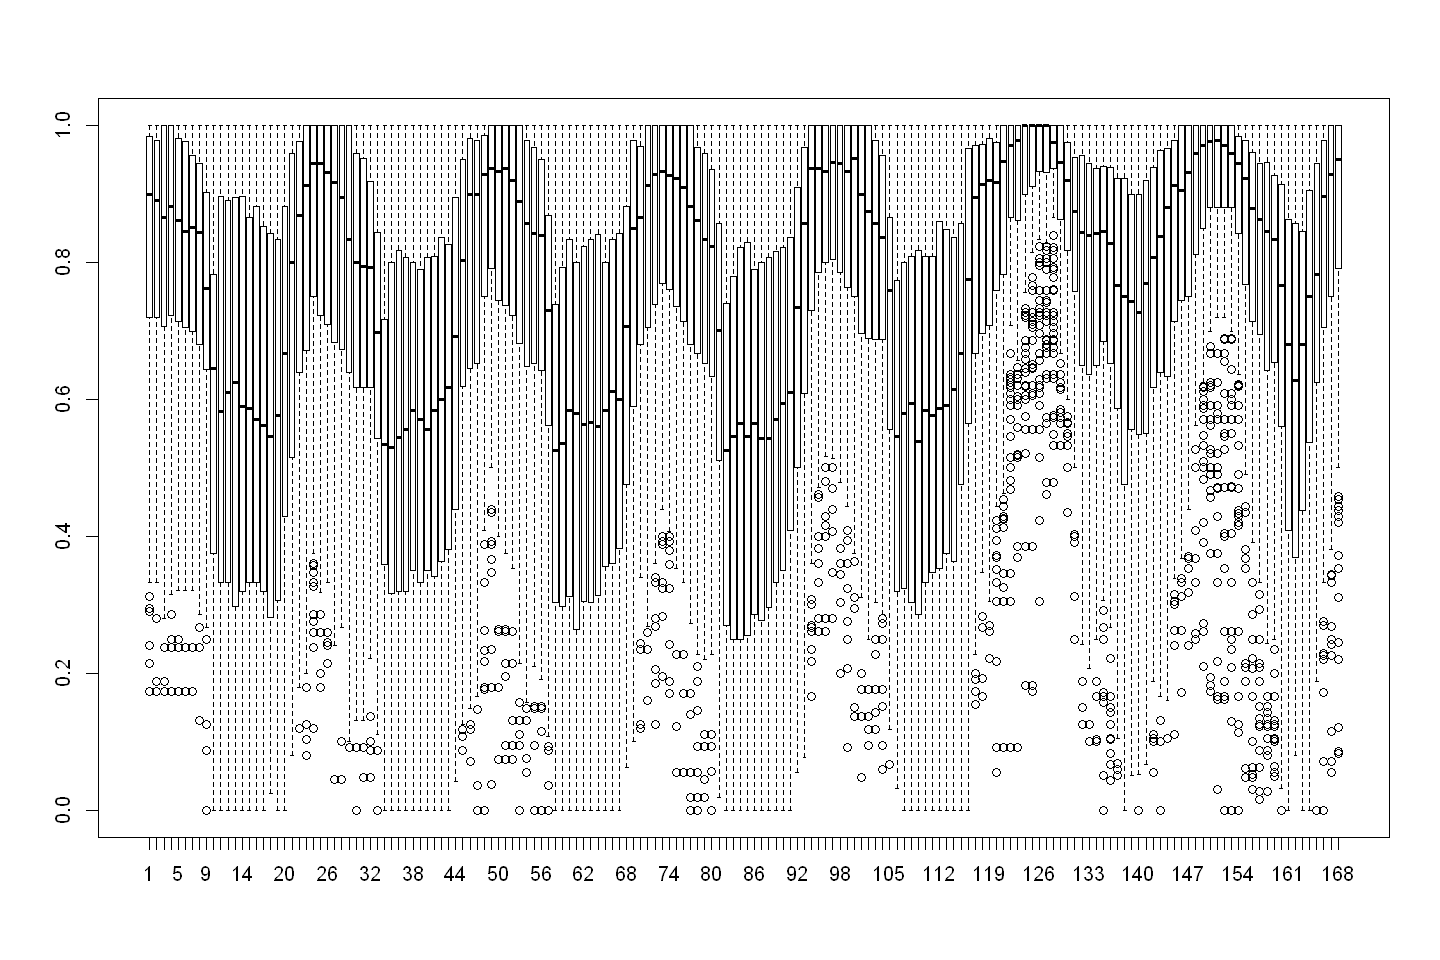

In [63]:
boxplot(x[which(km$cluster == 5),])

## Gaussian Mixture

In [64]:
mvpdf <- function(x, mu, sigma) {
    if (det(sigma) == 0) {
        warning("Determinant is equal to 0.")
    }
    apply(x, 1, function(x) exp(-(1/2) * (t(x) - mu) %*% MASS::ginv(sigma) %*% 
        t(t(x) - mu))/sqrt(det(2 * pi * sigma)))
}

In [65]:
# Mclust comes with a method of hierarchical clustering. We'll
# initialize 5 different classes.
initialk <- mclust::hc(data = x, modelName = "EII")
initialk <- mclust::hclass(initialk, 5)
# First split by class and calculate column-means for each class.
mu <- split(x[,], initialk)
mu <- t(sapply(mu, colMeans))
# Covariance Matrix for each initial class.
cov <- list(diag(4), diag(4), diag(4))
# Mixing Components
a <- runif(5)
a <- a/sum(a)

ERROR: Error in hcEII(data = structure(c(-0.181413225285772, 0.385733973979327, : impossible de trouver la fonction "hcEII"


In [ ]:
# Total Responsibility
mc <- colSums(r)
# Update Mixing Components.
a <- mc/NROW(iris)
# Update our Means
mu <- rbind(colSums(iris[, 1:4] * r[, 1]) * 1/mc[1], colSums(iris[, 1:4] * 
    r[, 2]) * 1/mc[2], colSums(iris[, 1:4] * r[, 3]) * 1/mc[3])
# Update Covariance matrix.
cov[[1]] <- t(r[, 1] * t(apply(iris[, 1:4], 1, function(x) x - mu[1, ]))) %*% 
    (r[, 1] * t(apply(iris[, 1:4], 1, function(x) x - mu[1, ]))) * 1/mc[1]
cov[[2]] <- t(r[, 2] * t(apply(iris[, 1:4], 1, function(x) x - mu[2, ]))) %*% 
    (r[, 2] * t(apply(iris[, 1:4], 1, function(x) x - mu[2, ]))) * 1/mc[2]
cov[[3]] <- t(r[, 3] * t(apply(iris[, 1:4], 1, function(x) x - mu[3, ]))) %*% 
    (r[, 3] * t(apply(iris[, 1:4], 1, function(x) x - mu[3, ]))) * 1/mc[3]

In [25]:
#install.packages("mclust")
library(mclust)

Warning message:
"package 'mclust' was built under R version 3.6.3"Package 'mclust' version 5.4.7
Type 'citation("mclust")' for citing this R package in publications.


In [22]:
acp <- PCA(x, scale.unit = TRUE, graph = F,ncp=10)

In [23]:
xp <- acp$ind$coord
rownames(xp) <- NULL
head(xp)

Dim.1,Dim.2,Dim.3,Dim.4,Dim.5,Dim.6,Dim.7,Dim.8,Dim.9,Dim.10
-3.0471538,-6.561908,-1.773282,4.000091,2.776679,-0.07955264,0.7513939,0.5783547,0.5135734,1.1112633
6.4790797,-11.625998,-1.169473,3.236846,1.466361,-1.08028988,-2.0366467,1.2602478,-0.5039271,0.2932715
3.1200033,3.041737,-2.894558,2.553074,3.030746,0.25369362,-1.6106494,1.0642883,0.4300576,0.4698376
0.6590946,9.916072,2.813183,-6.276868,-4.656399,0.94248307,2.8555840,-1.4503843,-1.5099387,1.0020110
4.4430947,7.624636,1.570474,2.915719,-2.173993,-2.65511062,-0.4243007,1.2568686,-0.4182038,0.2008762
-0.4127882,-5.101806,-2.520046,2.441781,2.559581,1.21840041,-0.3360231,3.4125840,-3.6752047,-1.1893696


In [37]:
# specify number of clusters
mb5 = Mclust(xp, 5)

# optimal selected model
mb5$modelName

# probality for an observation to be in a given cluster
head(mb$z)

# get probabilities, means, variances
summary(mb5, parameters = TRUE)

[1] "VVV"

3.002711e-03,9.952268e-01,2.046446e-19,0.0017678386,2.622985e-10,1.083684e-22,2.664334e-06,4.802492e-47,2.486859e-13
1.006781e-04,9.989084e-01,3.641353e-28,0.0009908345,8.480506e-22,1.079924e-07,1.426615e-25,4.754645e-128,6.762796e-39
1.310616e-01,5.263814e-23,1.424466e-02,0.8546935982,1.074222e-26,3.772945e-13,2.603493e-09,8.520358e-57,1.129775e-07
2.533003e-09,6.881029e-64,9.996481e-01,0.0003518884,1.500909e-54,5.177362e-29,1.136273e-20,7.621974e-110,7.422262e-12
1.750886e-01,7.522176e-58,3.046525e-02,0.7944455980,1.419366e-46,2.649786e-13,1.655014e-13,2.306023e-63,5.842328e-07
3.684214e-04,4.875008e-01,5.560720e-17,0.5121307939,1.795184e-15,5.065485e-17,1.790429e-08,3.785829e-70,5.176727e-15


---------------------------------------------------- 
Gaussian finite mixture model fitted by EM algorithm 
---------------------------------------------------- 

Mclust VVV (ellipsoidal, varying volume, shape, and orientation) model with 5
components: 

 log-likelihood    n  df       BIC       ICL
      -25323.37 1189 329 -52976.34 -53087.97

Clustering table:
  1   2   3   4   5 
455 144 197 224 169 

Mixing probabilities:
        1         2         3         4         5 
0.3915275 0.1182710 0.1639020 0.1832344 0.1430651 

Means:
              [,1]         [,2]        [,3]        [,4]        [,5]
Dim.1   2.89230666 14.246845286 -9.48103274 -3.05496611 -4.91854447
Dim.2   1.66442291 -1.928181269 -2.62595383 -6.16338191  7.94130235
Dim.3  -0.09923904 -0.527097107  0.37115549 -0.69320861  1.16996860
Dim.4   0.06078107 -0.478529283 -0.07013889  0.35215069 -0.14141470
Dim.5   0.09867388 -0.036072471 -0.18381680  0.05574596 -0.10102987
Dim.6  -0.09322754  0.244190756  0.38617516 -0.031970

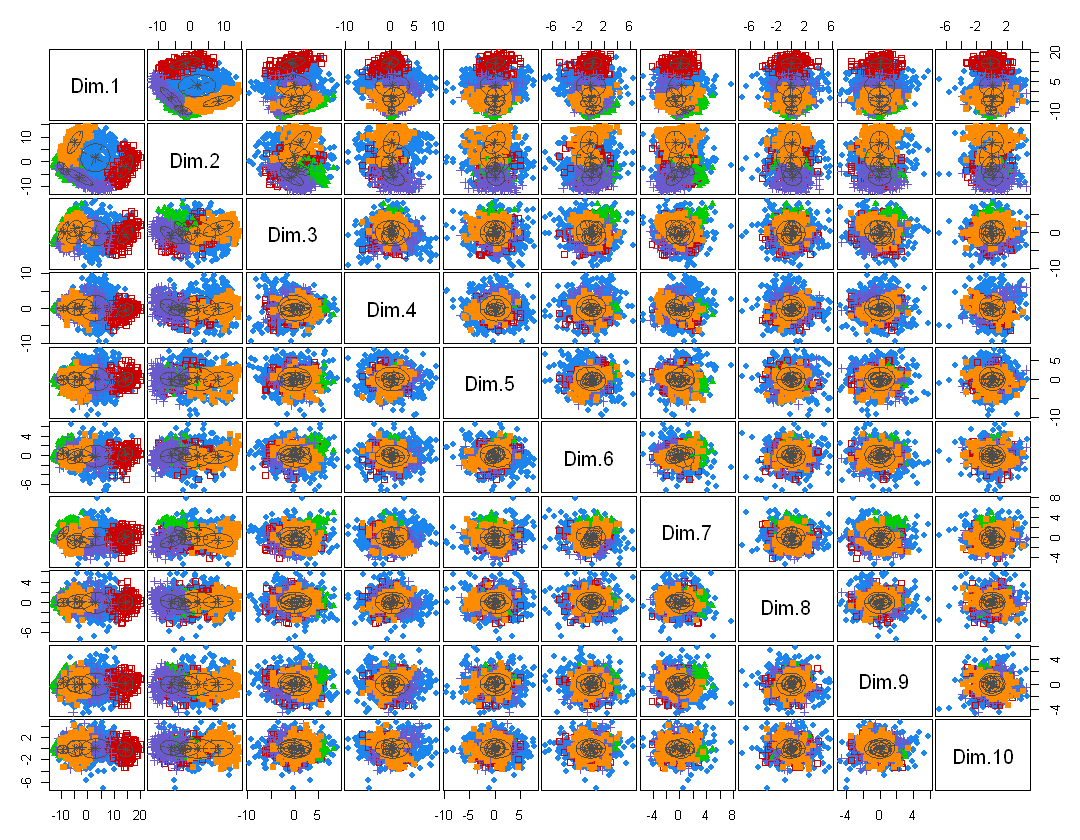

In [32]:
plot(mb5, what=c("classification"))

In [30]:
summary(mb5)

---------------------------------------------------- 
Gaussian finite mixture model fitted by EM algorithm 
---------------------------------------------------- 

Mclust VVV (ellipsoidal, varying volume, shape, and orientation) model with 5
components: 

 log-likelihood    n  df       BIC       ICL
      -25323.37 1189 329 -52976.34 -53087.97

Clustering table:
  1   2   3   4   5 
455 144 197 224 169 

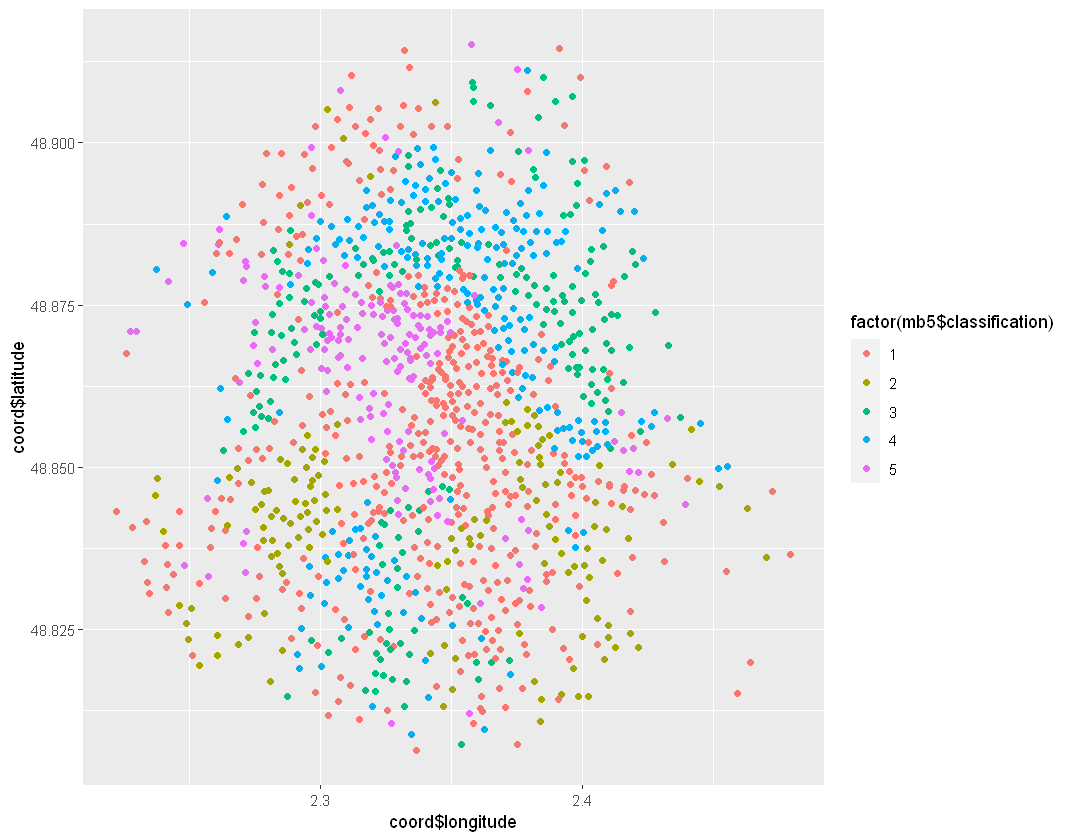

In [35]:
qplot(coord$longitude,coord$latitude, color = factor(mb5$classification))  

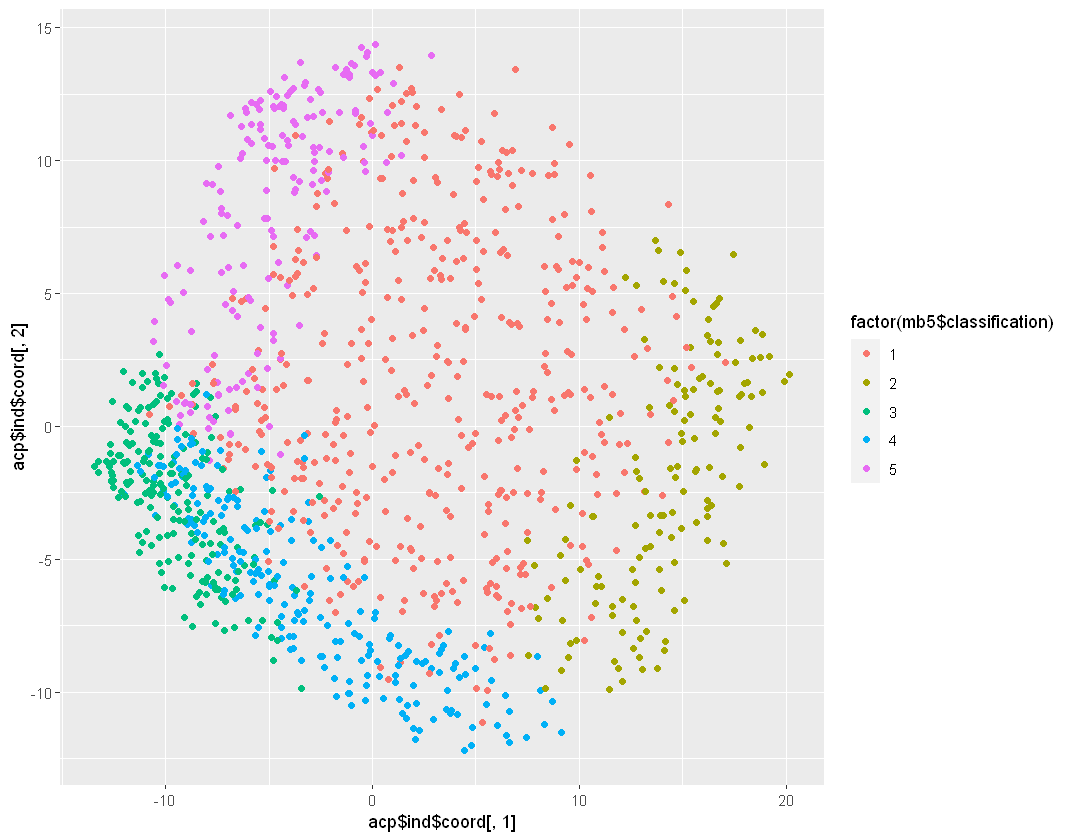

In [36]:
qplot(acp$ind$coord[,1],acp$ind$coord[,2], color = factor(mb5$classification))  

## Analyse des correspondances multiples

In [5]:
Xcat <- data.frame(hill = factor(velib$bonus, labels = c("nohill", "hill")))
day <- 7:20
night <- c(1:6, 21:24)
breaks <- c(-0.01, 1/3, 2/3, 1.01)
labels <- letters[1:(length(breaks)-1)]
for (i in 1:7){
  newCol <- rowMeans(x[, day + (i-1)*24])
  newCol <- cut(newCol, breaks = breaks, labels = labels)
  newName <- paste('day', i, sep = '')
  Xcat <- cbind(Xcat, newCol)
  names(Xcat)[ncol(Xcat)] <- newName
}
for (i in 1:7){
  newCol <- rowMeans(x[, night + (i-1)*24])
  newCol <- cut(newCol, breaks = breaks, labels = labels)
  Xcat <- cbind(Xcat, newCol)
  newName <- paste('night', i, sep = '')
  names(Xcat)[ncol(Xcat)] <- newName
}
#rownames(Xcat) <- velib$names
head(Xcat)

,hill,day1,day2,day3,day4,day5,day6,day7,night1,night2,night3,night4,night5,night6,night7
,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>
1,nohill,a,a,a,a,a,a,a,a,b,b,b,c,a,a
2,nohill,a,a,a,a,a,b,b,b,c,c,c,c,c,b
3,nohill,a,c,b,b,b,b,b,a,b,b,b,b,b,b
4,nohill,c,b,b,b,b,b,c,b,a,a,a,a,a,b
5,nohill,c,c,b,b,c,a,b,b,b,b,a,b,b,b
6,nohill,a,a,a,a,a,b,a,b,b,b,b,b,b,a


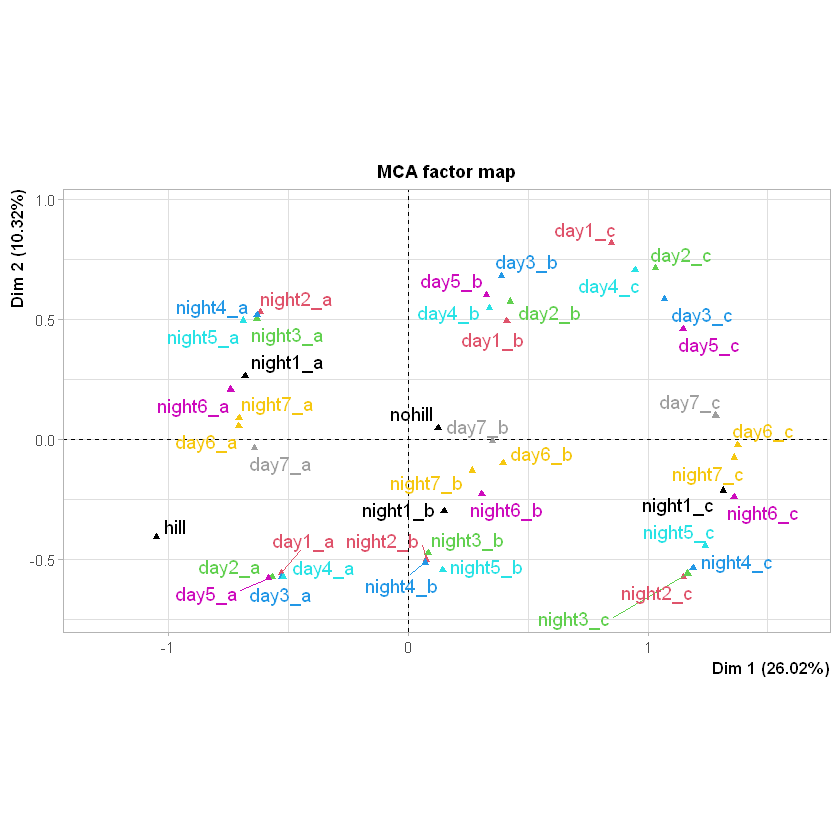

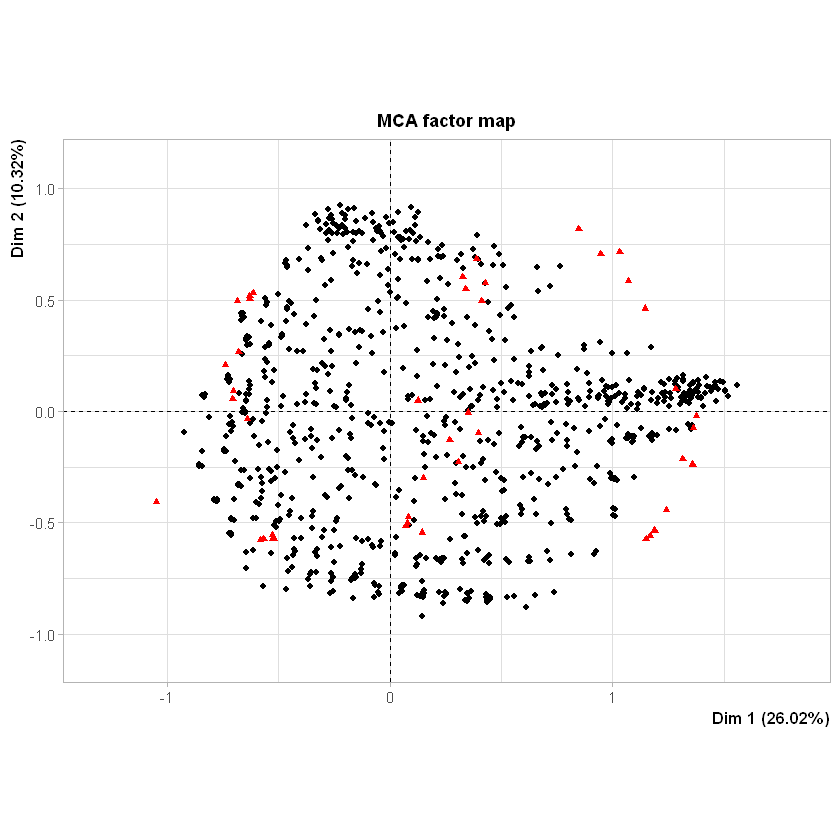

In [6]:
afcm <- MCA(Xcat, graph = FALSE)
plot(afcm, axes = c(1, 2), choix = "ind", invisible = "ind", habillage = "quali")
plot(afcm, axes = c(1, 2), choix = "ind", label = "no")

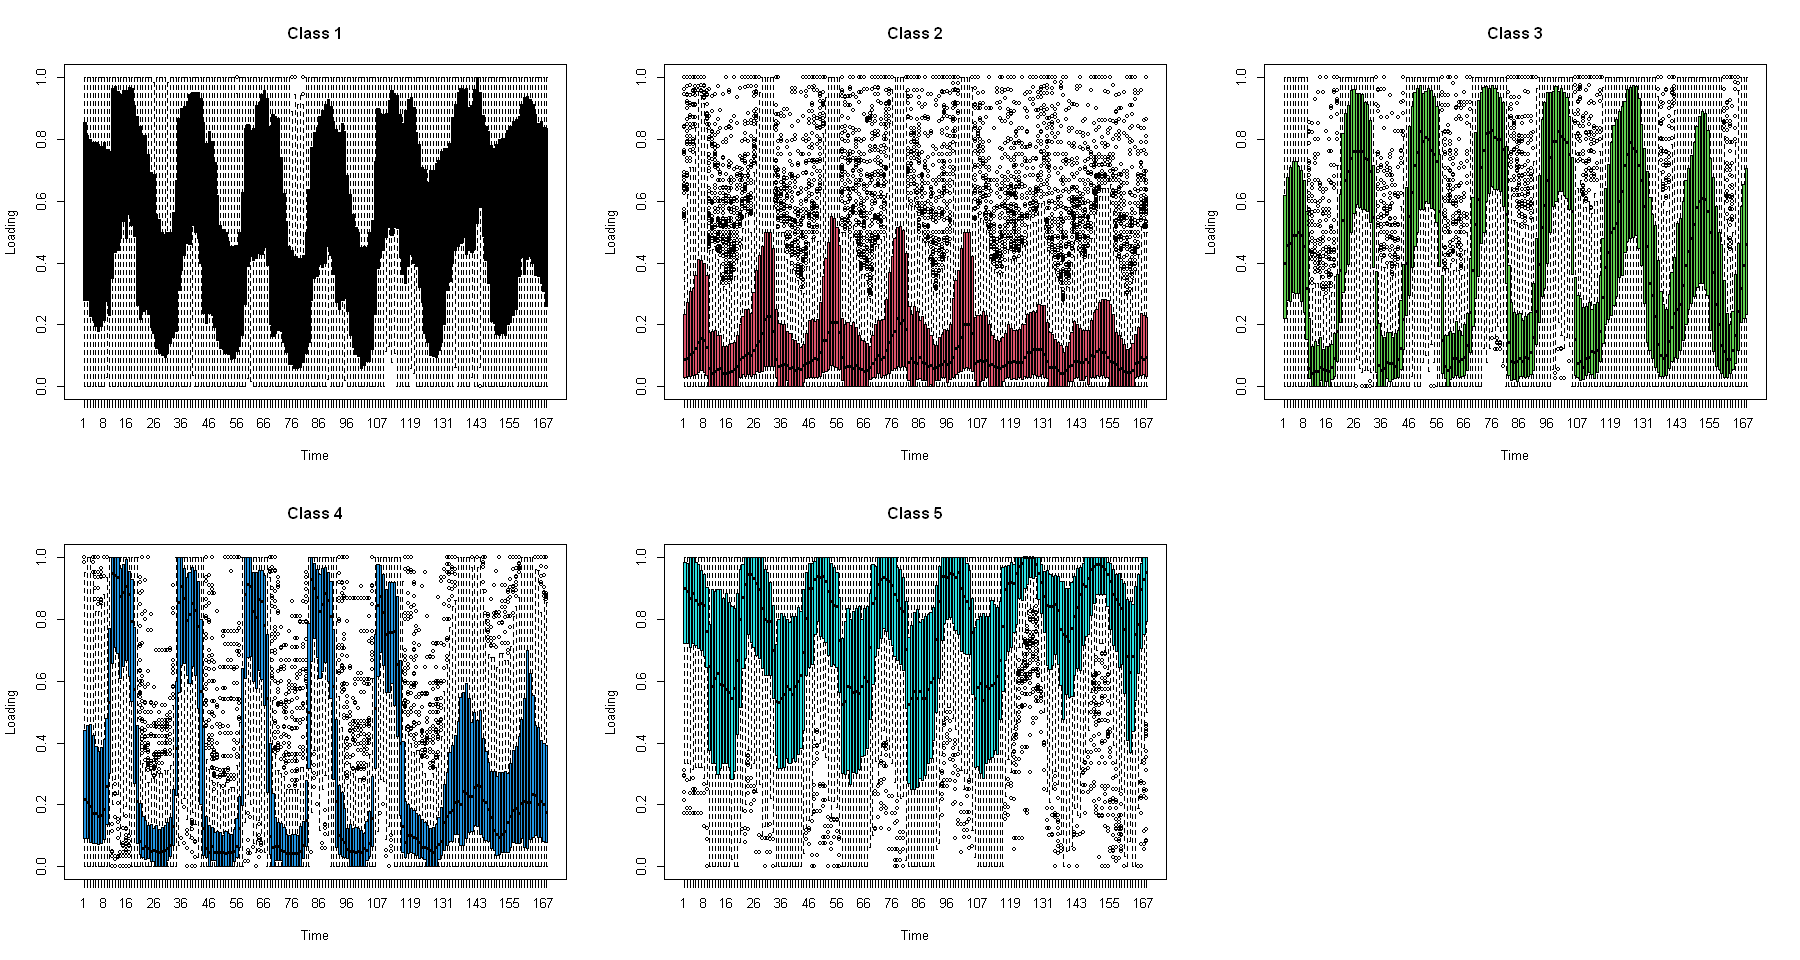

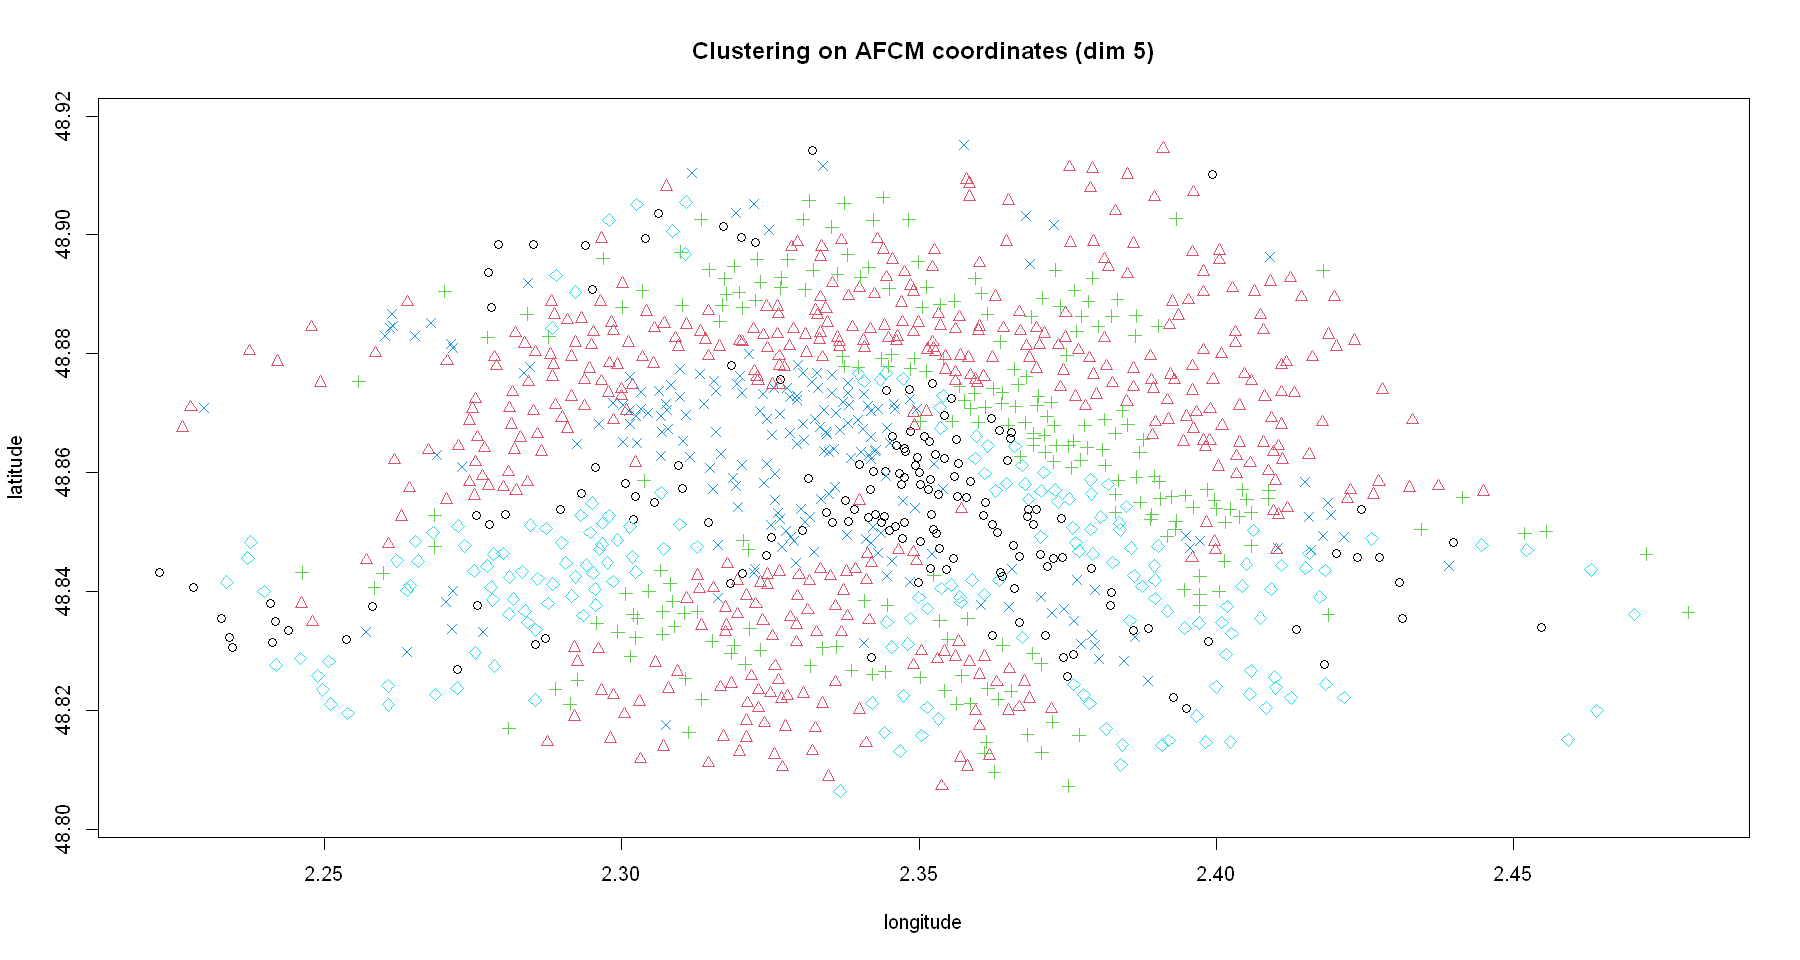

In [12]:
K <- 5
reskmAFCM <- kmeans(x, centers = K, nstart = 10)
# visualization of the clusters, as time series
options(repr.plot.width=15,repr.plot.height=8)
par(mfrow = c(2, 3))
for (i in 1:K){
  boxplot(x[which(reskmAFCM$cluster == i), ], col = i, 
          xlab = "Time", ylab = "Loading", main = paste("Class", i))
}
# visualization of the clusters on a 2D map
par(mfrow = c(1, 1))
plot(coord, pch = reskmAFCM$cluster, col = reskmAFCM$cluster, asp = 1, 
     main = "Clustering on AFCM coordinates (dim 5)")

In [13]:
table(reskmAFCM$cluster, Xcat$hill)

   
    nohill hill
  1    153    0
  2    307  116
  3    223    6
  4    191    4
  5    188    1

In [14]:
Xcat2 <- Xcat[,-1]
head(Xcat2)

,day1,day2,day3,day4,day5,day6,day7,night1,night2,night3,night4,night5,night6,night7
,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>
1,a,a,a,a,a,a,a,a,b,b,b,c,a,a
2,a,a,a,a,a,b,b,b,c,c,c,c,c,b
3,a,c,b,b,b,b,b,a,b,b,b,b,b,b
4,c,b,b,b,b,b,c,b,a,a,a,a,a,b
5,c,c,b,b,c,a,b,b,b,b,a,b,b,b
6,a,a,a,a,a,b,a,b,b,b,b,b,b,a


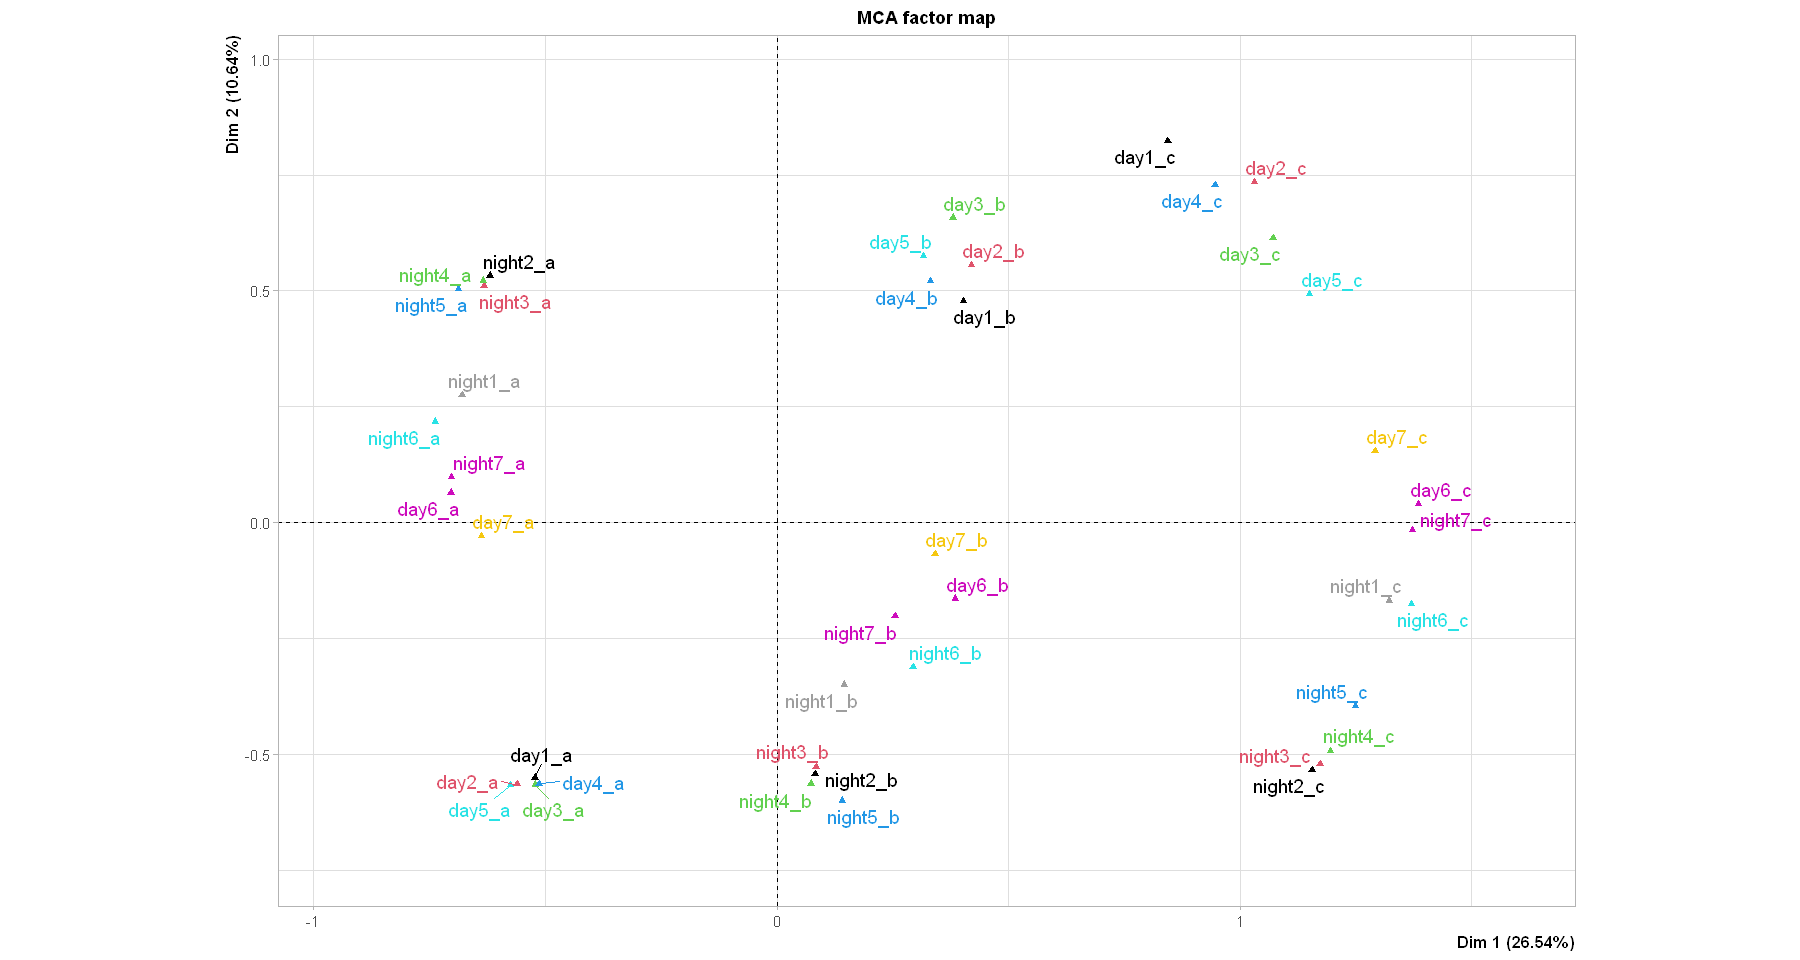

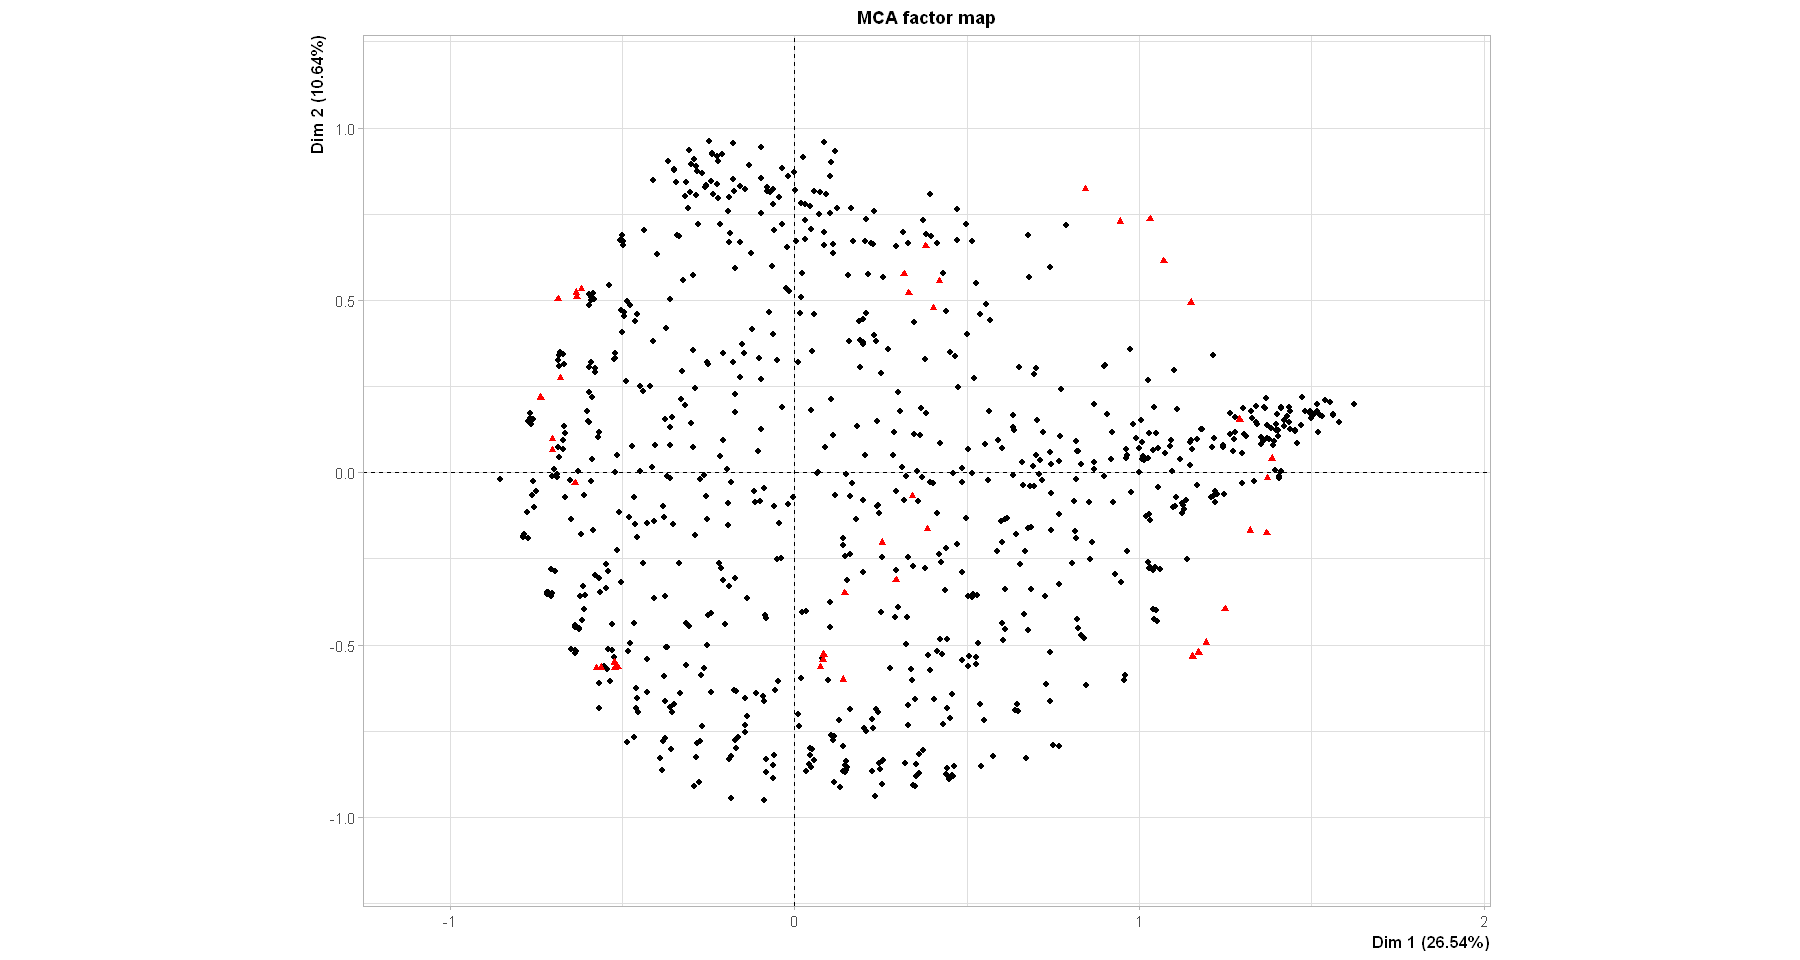

In [15]:
afcm2 <- MCA(Xcat2,graph = FALSE)
plot(afcm2, axes = c(1, 2), choix = "ind", invisible = "ind", habillage = "quali")
plot(afcm2, axes = c(1, 2), choix = "ind", label = "no")

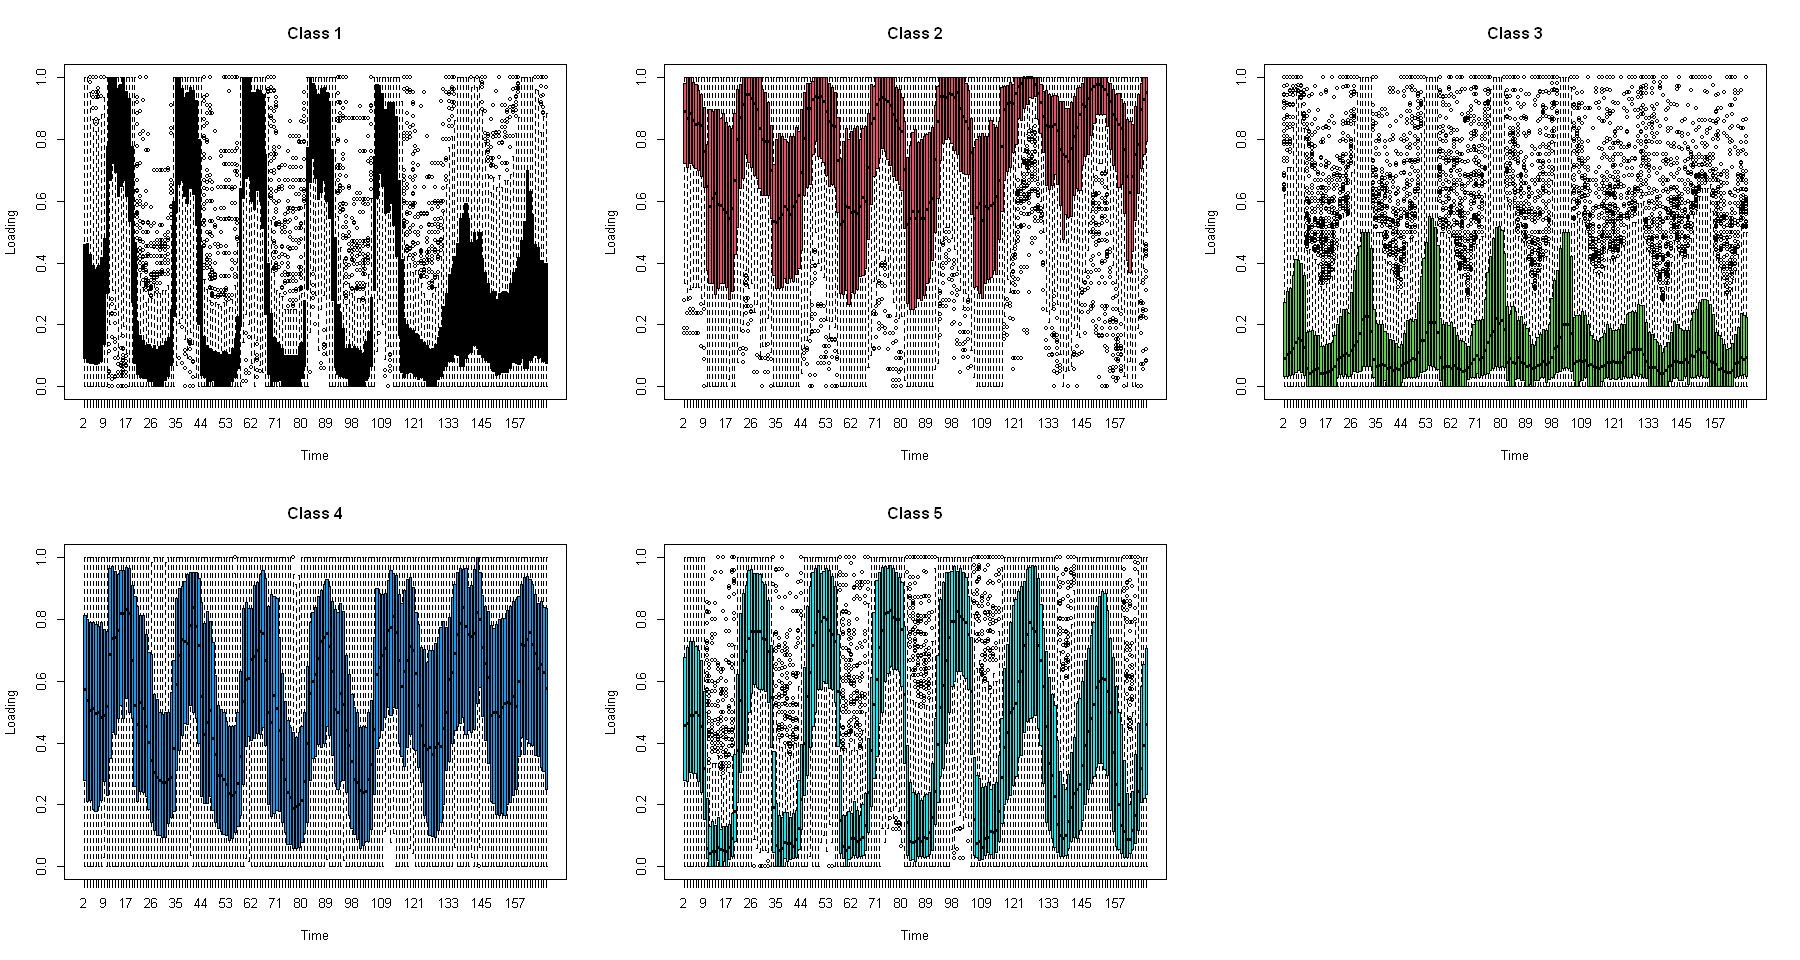

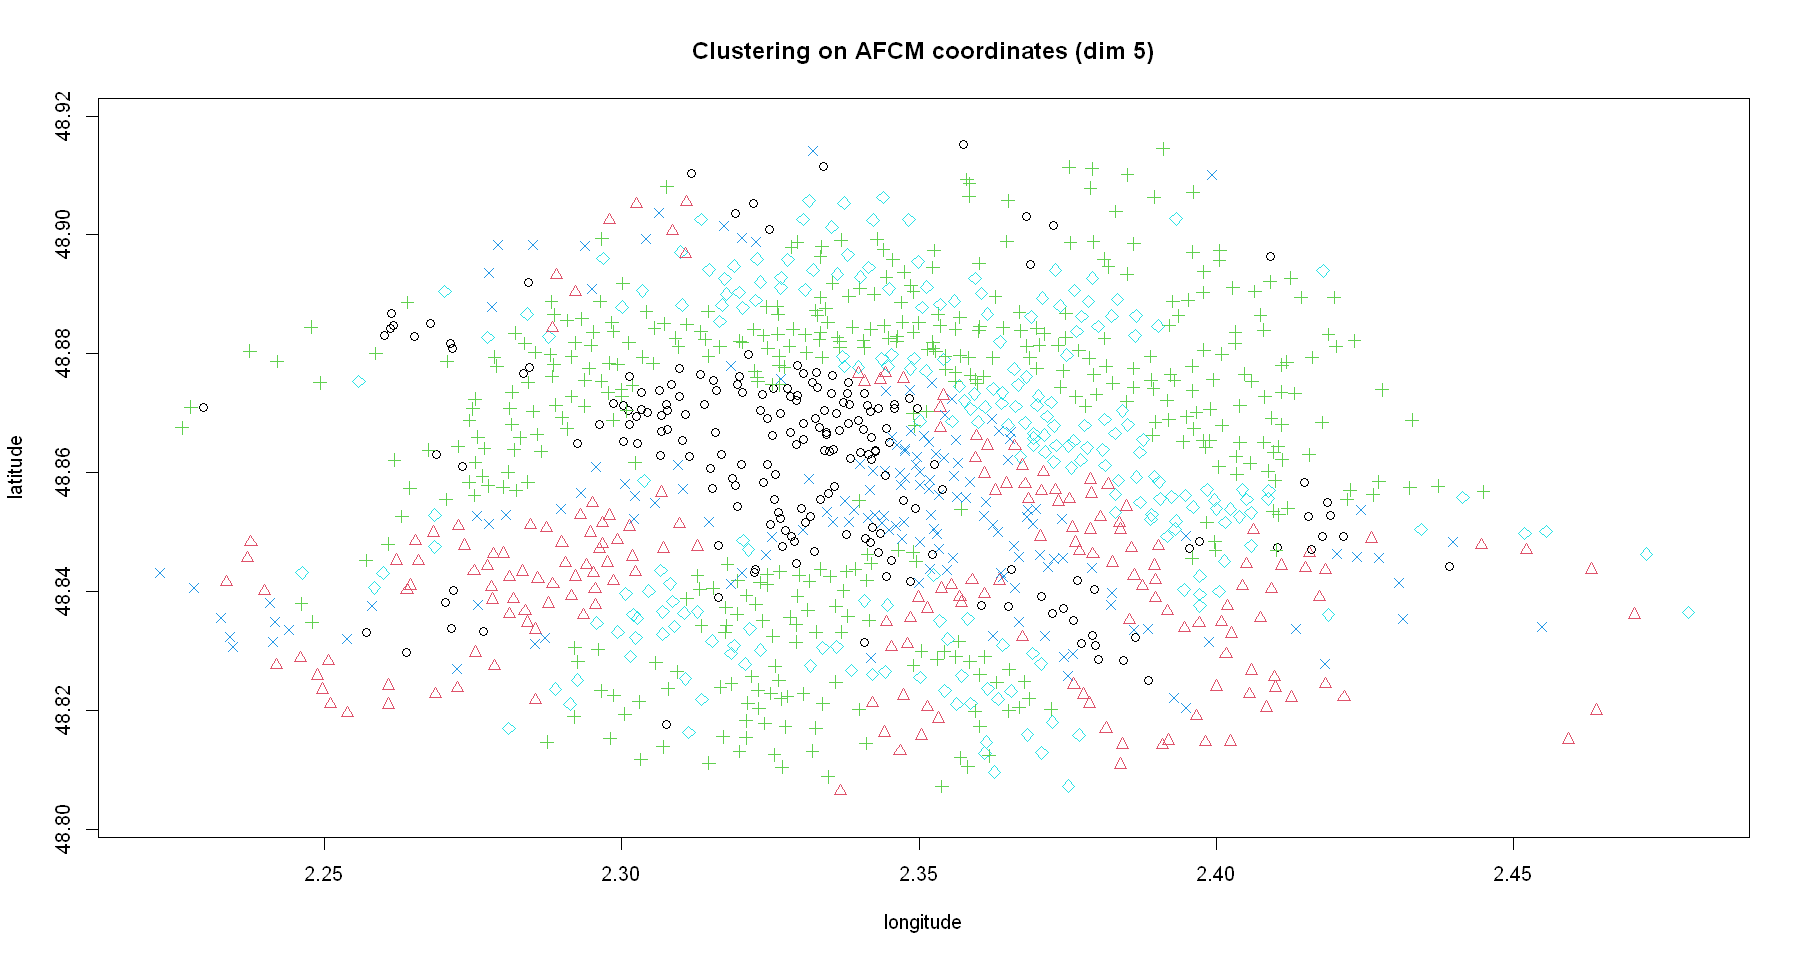

In [16]:
x <- x[,-1]

K <- 5
reskmAFCM <- kmeans(x, centers = K, nstart = 10)
# visualization of the clusters, as time series
par(mfrow = c(2, 3))
for (i in 1:K){
  boxplot(x[which(reskmAFCM$cluster == i), ], col = i, 
          xlab = "Time", ylab = "Loading", main = paste("Class", i))
}
# visualization of the clusters on a 2D map
par(mfrow = c(1, 1))
plot(coord, pch = reskmAFCM$cluster, col = reskmAFCM$cluster, asp = 1, 
     main = "Clustering on AFCM coordinates (dim 5)")